# Imports

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib
import plotly.express as px

from datetime import date

import warnings
warnings.filterwarnings("ignore")

In [2]:
pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 68.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ed62963c3b1f11390941004df401d43beff2c93649632f9ae5ffc0396cf9c45c
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [3]:
main_df = pd.read_csv("/content/marketing_campaign.csv", sep="\t")
main_df.head(10).style.background_gradient(cmap='Reds')


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000000,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000000,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000000,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.000000,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.000000,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.000000,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.000000,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.000000,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.000000,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.000000,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [4]:
df = main_df.copy()
df.head(10).style.background_gradient(cmap='Reds')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000000,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000000,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000000,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.000000,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.000000,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.000000,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.000000,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.000000,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.000000,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.000000,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [5]:
from ydata_profiling import ProfileReport

#profile = ProfileReport(df, title="Profiling Report")
#profile

# Exploration et nettoyage des données

## Valeurs manquantes

In [6]:
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, Percentage], axis=1, keys=['Total', 'Percentage'])

missing_data(df).style.background_gradient(cmap='Reds')

,Total,Percentage
Income,24,1.071429
ID,0,0.000000
NumDealsPurchases,0,0.000000
Z_Revenue,0,0.000000
Z_CostContact,0,0.000000
Complain,0,0.000000
AcceptedCmp2,0,0.000000
AcceptedCmp1,0,0.000000
AcceptedCmp5,0,0.000000
AcceptedCmp4,0,0.000000


In [7]:
df.loc[(df['Income'].isnull() == True), 'Income'] = df['Income'].mean()

missing_data(df).style.background_gradient(cmap='Reds')

,Total,Percentage
ID,0,0.000000
NumDealsPurchases,0,0.000000
Z_Revenue,0,0.000000
Z_CostContact,0,0.000000
Complain,0,0.000000
AcceptedCmp2,0,0.000000
AcceptedCmp1,0,0.000000
AcceptedCmp5,0,0.000000
AcceptedCmp4,0,0.000000
AcceptedCmp3,0,0.000000


## Stats des données numériques

In [8]:
df.describe().style.background_gradient(cmap='Reds')

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.000000,11.000000,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.000000,0.000000,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,11.000000,1.000000


## Doublons
Recherche des doublons, hors colonne `ID`.

In [9]:
# Sélection de toutes les colonnes sauf 'ID'
subset = df.columns.drop('ID')
# Compte du nombre de doublons
df.duplicated(subset=subset).value_counts()

False    2058
True      182
dtype: int64

In [10]:
# Affichage de certaines lignes en doublon
duplicate_rows = df.duplicated(subset=subset,keep='first')
df[duplicate_rows].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
83,4119,1963,Master,Together,38620.0,0,0,11-05-2013,56,112,...,3,0,0,0,0,0,0,3,11,0
179,6935,1951,2n Cycle,Married,78497.0,0,0,01-12-2013,44,207,...,2,0,0,0,1,0,0,3,11,0
281,10144,1976,Graduation,Together,51369.0,0,1,25-10-2012,84,297,...,8,0,0,0,0,0,0,3,11,0
282,8652,1946,Graduation,Together,37760.0,0,0,31-08-2012,20,84,...,7,0,0,0,0,0,0,3,11,0
363,933,1978,PhD,Married,37717.0,1,0,23-11-2012,31,9,...,9,0,0,0,0,0,0,3,11,0


In [11]:
# Suppression des doublons
df_2 = df.copy()
df_2.drop_duplicates(subset=subset, keep='first', inplace=True)

# Vérification
df_2.duplicated(subset=subset).value_counts()

False    2058
dtype: int64

## Modification / suppression de valeurs

### Catégories peu représentées

In [12]:
df_2.Marital_Status.value_counts()

Married     795
Together    521
Single      448
Divorced    216
Widow        71
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Remplacement des 3 valeurs 'Alone' (seul) par 'Single' (célibataire), et suppression des 2 valeurs 'Absurd' et 'YOLO' qui sont négligeables.

In [13]:
# Remplacement des valeurs 'Alone' par 'Single'
df_3 = df_2.copy()
mask_3 = (df_3.Marital_Status == 'Alone')
df_3.loc[mask_3, 'Marital_Status'] = 'Single'

# Vérification
df_3.Marital_Status.value_counts()

Married     795
Together    521
Single      451
Divorced    216
Widow        71
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [14]:
# Suppression des lignes avec valeurs de Marial_Status 'Absurd' et 'YOLO'
mask_3 = (df_3.Marital_Status == 'Absurd') | (df_3.Marital_Status == 'YOLO')
# df_3[mask_3].index
df_3.drop(index=df_3[mask_3].index, inplace = True)

# Vérification
df_3.Marital_Status.value_counts()

Married     795
Together    521
Single      451
Divorced    216
Widow        71
Name: Marital_Status, dtype: int64

### Colonnes ayant 1 ou 2 valeurs

In [15]:
df_3.nunique()

ID                     2054
Year_Birth               59
Education                 5
Marital_Status            5
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

### Suppression colonnes avec une seule valeur
Colonnes `Z_CostContact` et `Z_Revenue`.

In [16]:
df_3=df_3.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)

### Colonnes avec deux valeurs

In [17]:
# Affichage du nombre de valeurs pour les colonnes ayant 2 valeurs
for col in [
    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
    'AcceptedCmp2', 'Complain', 'Response']:
    print(df_3[col].value_counts())
    print()

0    1903
1     151
Name: AcceptedCmp3, dtype: int64

0    1896
1     158
Name: AcceptedCmp4, dtype: int64

0    1907
1     147
Name: AcceptedCmp5, dtype: int64

0    1920
1     134
Name: AcceptedCmp1, dtype: int64

0    2028
1      26
Name: AcceptedCmp2, dtype: int64

0    2034
1      20
Name: Complain, dtype: int64

0    1743
1     311
Name: Response, dtype: int64



### Faut-il supprimer `AcceptedCmp2` et `Complain` ?
Car peu de valeurs : respectivement 26 et 20.

# Creation et analyse des variables

## Kids (enfants + ados)
**Création de Kids avec Kidhome + Teenhome**

In [18]:
df_4 = df_3.copy()
df_4['Kids'] = df_4['Kidhome'] + df_4['Teenhome']

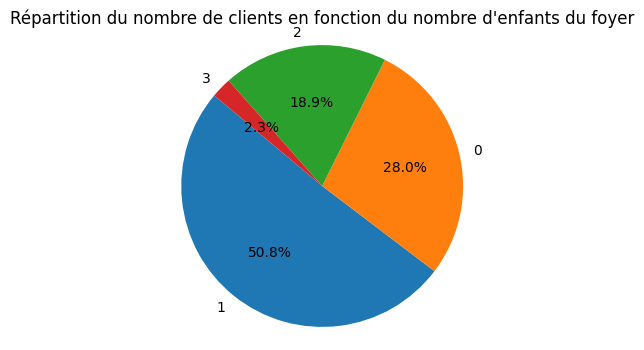

In [19]:
# Camembert répartition du nb d'enfants dans le foyer
plt.figure(figsize=(4, 4))
df_4['Kids'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Répartition du nombre de clients en fonction du nombre d'enfants du foyer")
plt.ylabel('')
plt.axis('equal')
plt.show()

## Dépenses totales
**Création des dépenses en regroupant les colonnes concernées**

In [20]:
df_4['Expenses'] = df_4['MntWines'] + df_4['MntFruits'] + df_4['MntMeatProducts'] + df_4['MntFishProducts'] + df_4['MntSweetProducts'] + df_4['MntGoldProds']

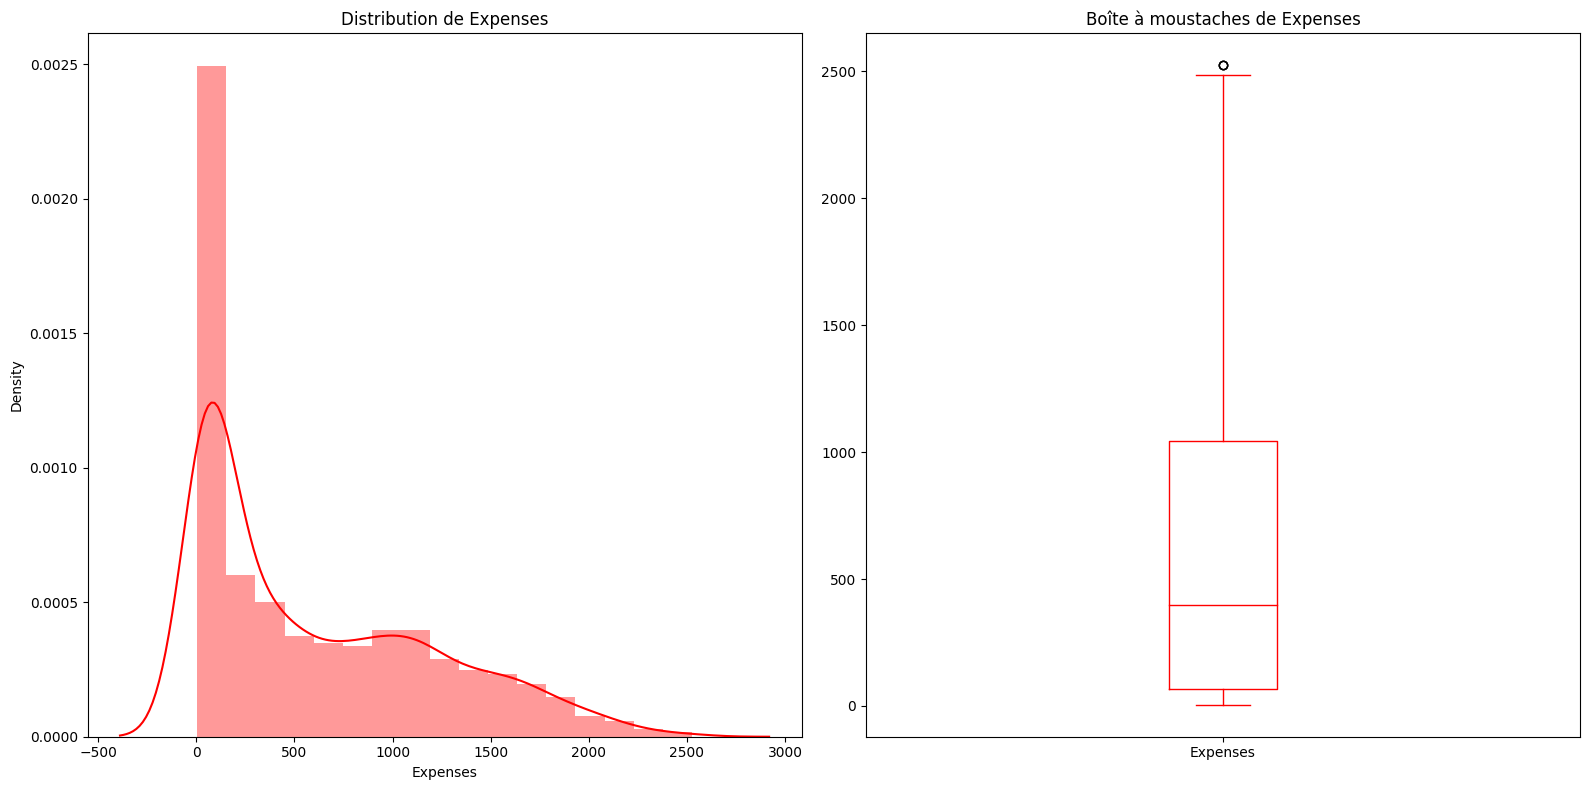

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.distplot(df_4["Expenses"], color='red', ax=axes[0])
axes[0].set_title('Distribution de Expenses')

df_4["Expenses"].plot.box(color='red', ax=axes[1])
axes[1].set_title('Boîte à moustaches de Expenses')

plt.tight_layout()
plt.show()


## Nbre visites / mois et achats sur le site
**Analyse du nbr de visites par mois sur le site et des achats réalisés**

Text(0.5, 1.0, 'Distribution du nbr dachats sur le site par mois')

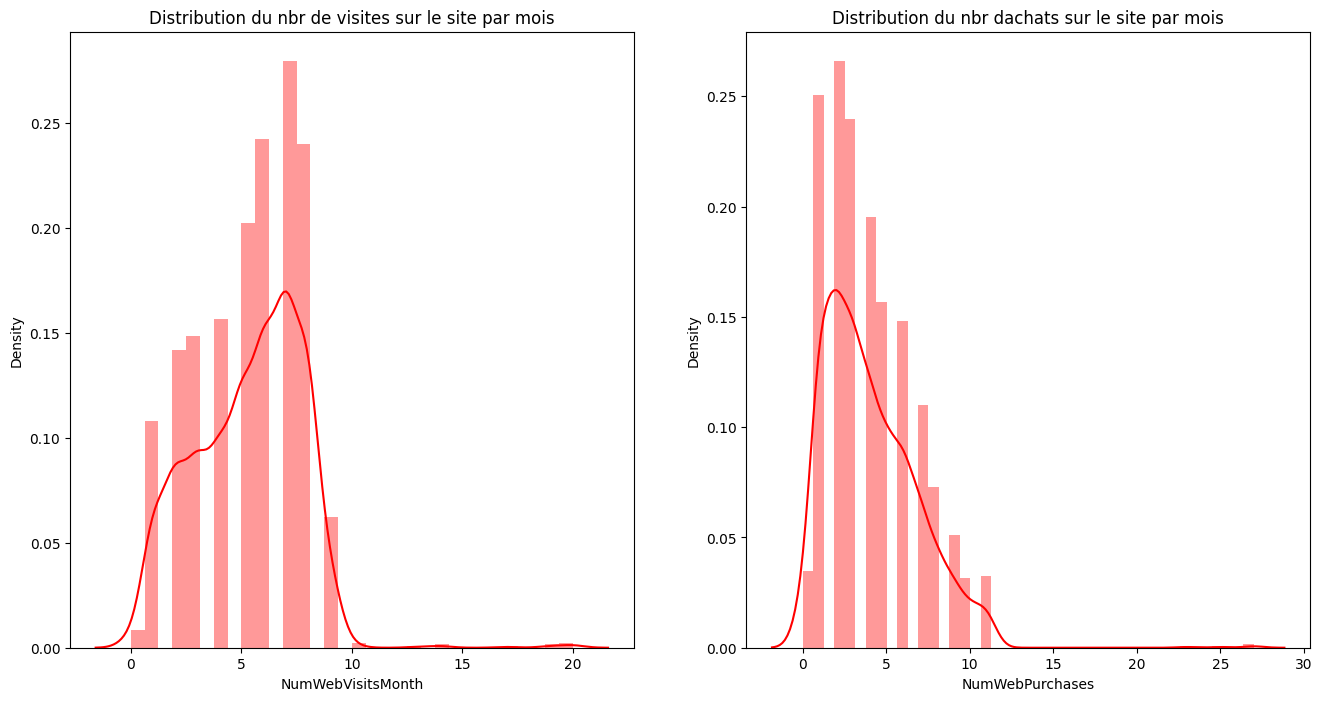

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.distplot(df_4["NumWebVisitsMonth"], color='red', ax=axes[0])
axes[0].set_title('Distribution du nbr de visites sur le site par mois')

sns.distplot(df_4["NumWebPurchases"], color='red', ax=axes[1])
axes[1].set_title('Distribution du nbr dachats sur le site par mois')

## Situations familiales
**Regroupement des situations familiales de manière logique, Single ou Relationship**

In [23]:
df_5 = df_4.copy()
df_5['Relation_Status'] = df_5['Marital_Status']
df_5['Relation_Status'] = df_5['Relation_Status'].replace(['Married', 'Together'],'Relationship')
df_5['Relation_Status'] = df_5['Relation_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

<Figure size 800x800 with 0 Axes>

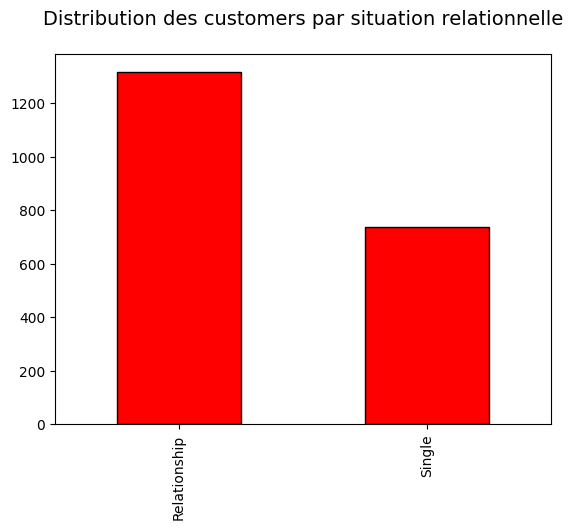

<Figure size 800x800 with 0 Axes>

In [24]:
df_5['Relation_Status'].value_counts().plot(kind='bar',color = 'red',edgecolor = "black",linewidth = 1)
plt.title("Distribution des customers par situation relationnelle\n",fontsize=14)
plt.figure(figsize=(8,8))

## Income des customers
**Analyse de l'income des customers**

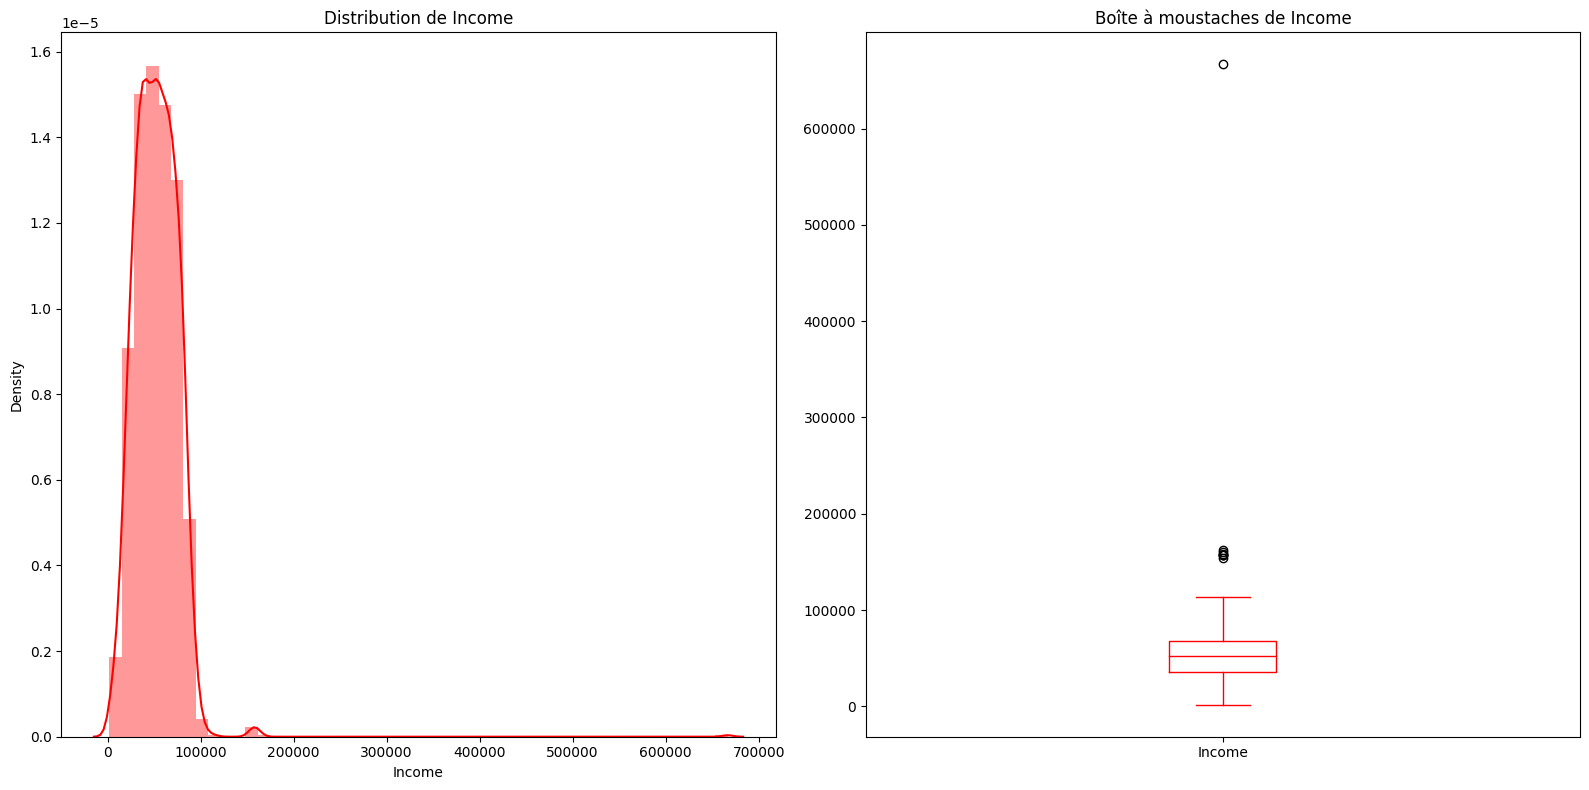

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.distplot(df_5["Income"], color='red', ax=axes[0])
axes[0].set_title('Distribution de Income')

df_5["Income"].plot.box(color='red', ax=axes[1])
axes[1].set_title('Boîte à moustaches de Income')

plt.tight_layout()
plt.show()


## Gestion des outliers

### Income

In [26]:
# Suppression des outliers de Income
df_6 = df_5.copy()
df_6.loc[df_6["Income"].idxmax()]
df_6.drop(df_6["Income"].idxmax(), inplace=True)

### Age

In [27]:
# Calcul de l'âge des clients
df_7 = df_6.copy()
df_7['Age']= 2024 - df_7['Year_Birth']

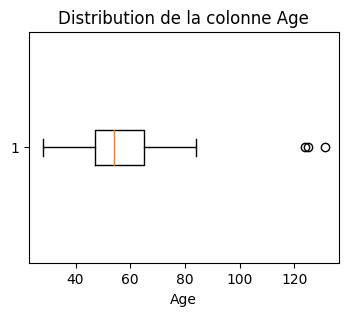

In [28]:
#Distribution de l'age
plt.figure(figsize=(4,3))
plt.boxplot(df_7["Age"],vert=False)
plt.title("Distribution de la colonne Age")
plt.xlabel("Age")
plt.show()

In [29]:
# Suppression des clients de plus de 90ans (ceux de 120 ans doivent être décédés)
df_7 = df_7[(df_7['Age'] >= 20) & (df_7['Age'] <= 90)]

In [30]:
bins = range(20, df_7['Age'].max() + 10, 10)

# Création libellé perso
labels = [f"{i}-{i+10} ans" for i in range(20, df_7['Age'].max(), 10)]

# Utiliser pd.cut() avec les bins et les libellés personnalisés
df_7['Age_group'] = pd.cut(df_7['Age'], bins, right=False, labels=labels)

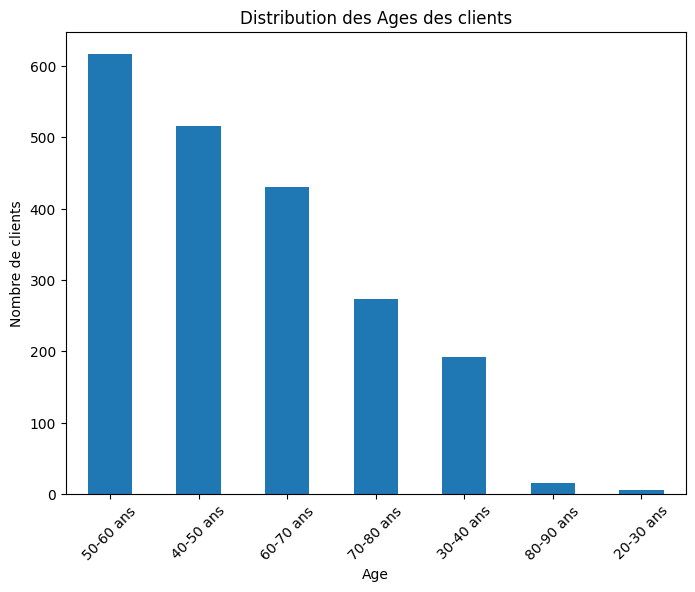

In [31]:
# Répartition des clients selon leur age
plt.figure(figsize=(8, 6))
df_7["Age_group"].value_counts().plot(kind='bar')
plt.title("Distribution des Ages des clients")
plt.xlabel("Age")
plt.ylabel("Nombre de clients")
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.show()

### Nombre achats sur Internet

In [32]:
# Nombre d'achats sur le webm supérieur à 10
df_7[df_7.NumWebPurchases > 10].NumWebPurchases.value_counts()

11    42
27     2
23     1
25     1
Name: NumWebPurchases, dtype: int64

In [33]:
# Suppression des nombres d'achat sur le web au-dessus de 12
df_7.drop(df_7[df_7.NumWebPurchases > 12].index, inplace = True)
# Vérification
df_7[df_7.NumWebPurchases > 10].NumWebPurchases.value_counts()

11    42
Name: NumWebPurchases, dtype: int64

### Nombre d'achats sur catalogue

In [34]:
# Nombre d'achats sur catalogue supérieur à 10
df_7[df_7.NumCatalogPurchases > 10].NumCatalogPurchases.value_counts()

11    18
28     3
22     1
Name: NumCatalogPurchases, dtype: int64

In [35]:
# Suppression des nombres d'achat sur catalogue au-dessus de 12
df_7.drop(df_7[df_7.NumCatalogPurchases > 12].index, inplace = True)
# Vérification
df_7[df_7.NumCatalogPurchases > 10].NumCatalogPurchases.value_counts()

11    18
Name: NumCatalogPurchases, dtype: int64

## DataFrame après les modifications

In [36]:
# Nombre de lignes et colonnes
df_7.shape

(2042, 32)

# Autres analyses graphiques

In [37]:
# Fonction pour tracer un Violin plot
def violin_plot(data_frame, col_x, col_y, title, height=400, width=800, color=None):
  fig_violin = px.violin(
    data_frame=data_frame,
    x=col_x,
    y=col_y,
    box = True, #points = "all",
    title = title,
    color=color,
    color_discrete_sequence =['steelblue']
  )

  # Mise en forme du layout
  fig_violin.update_layout(
      paper_bgcolor = 'ghostwhite', # nom de couleur (CSS name) pour le papier (arrière-plan)
      plot_bgcolor='white', # nom de couleur (CSS name) pour le fond du graphique
      title={'x':0.5, 'xanchor': 'center', # Centrage horizontal du titre
            'y': 0.97, 'yanchor': 'top', # aligmenent vertical du titre
            'font': {'size': 20},
            },
      height = height, # ajustement de la hauteur de la figure
      width = width, # ajustement de la largeur de la figure
      margin={'l':20, 'r':20, 't':40, 'b':20}, # ajustement des marges,
      violingap = 0.1,
      violingroupgap = 0.1, # écart entre boîtes du même groupe
      # boxgap=0.2, # écart autour des boîtes (pour boxplot)
      # boxgroupgap = 0.2, # écart entre boîtes du même groupe (pour boxplot)
      )

  # Mise en forme des axes
  fig_violin.update_xaxes(showgrid=True, linewidth=2, linecolor='black', gridwidth=1,
      gridcolor='LightGrey', griddash='dash',
      title_text=col_x,  # Personnalise le titre de l'axe
      title_font=dict(size=16), # Ajuste taille du titre de l'axe
      tickfont=dict(size=12), # Ajuste taille étiquettes de l'axe
  )
  fig_violin.update_yaxes(showgrid=True, linewidth=2, linecolor='black', gridwidth=1,
      gridcolor='LightGrey', griddash='dash',
      #title_text=col_y, # Personnalise le titre de l'axe
      title_font=dict(size=16), # Ajuste taille du titre de l'axe
      tickfont=dict(size=12), # Ajuste taille étiquettes de l'axe
  )

  fig_violin.update_traces(meanline_visible=True, # Ajout ligne pour la moyenne
      meanline_color='indianred')

  return fig_violin

In [38]:
#
df_7.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Kids', 'Expenses',
       'Relation_Status', 'Age', 'Age_group'],
      dtype='object')

In [39]:
# Renommage de colonnes :
# 'Expenses' en 'MntAllProducts'
# 'Kids' en 'TotalChildHome'
df_8 = df_7.copy()
df_8.rename(columns={'Expenses':'MntAllProducts', 'Kids':'TotalChildHome'},
            inplace=True)

# Changement de l'ordre des colonnes
df_8 = df_8[
    ['ID', 'Year_Birth', 'Age', 'Age_group', 'Education',
     'Marital_Status', 'Relation_Status', 'Income', 'Kidhome', 'Teenhome',
     'TotalChildHome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
     'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
     'MntAllProducts', 'NumDealsPurchases', 'NumWebPurchases',
     'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
     'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
     'AcceptedCmp5', 'Complain', 'Response']
]

# Affichage des colonnes pour vérification
df_8.columns

Index(['ID', 'Year_Birth', 'Age', 'Age_group', 'Education', 'Marital_Status',
       'Relation_Status', 'Income', 'Kidhome', 'Teenhome', 'TotalChildHome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'MntAllProducts',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1',
       'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'Complain', 'Response'],
      dtype='object')

In [40]:
 # Liste des colonnes numériques
lst_num_cols = df_8.select_dtypes(include='number').columns
lst_num_cols = lst_num_cols.drop(
    ['ID', 'Kidhome', 'Teenhome', 'TotalChildHome', 'AcceptedCmp1',
     'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain',
     'Response'])
lst_num_cols

Index(['Year_Birth', 'Age', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'MntAllProducts', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth'],
      dtype='object')

### Violin plot des colonnes numériques

In [41]:
for col in lst_num_cols:
  fig_violin = violin_plot(data_frame = df_8, col_x=col, col_y=None,
                           title=f'Violin plot of {col}', height=300)
  fig_violin.show()
  print()

## Violin plot des produits consommés par niveau d'éducation

In [42]:
# Liste des colonnes par type de produit
lst_prod_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                 'MntSweetProducts', 'MntGoldProds', 'MntAllProducts']
lst_products = ['wines', 'Fruits', 'meat', 'fish',
                 'sweet', 'gold', 'all products']

for col, prod in zip(lst_prod_cols, lst_products):
  fig_violin = violin_plot(data_frame=df_8, col_x=col, col_y='Education',
                           title=f'Amont spent on {prod} depending on Education level',
                           height=500, width=1000)
  fig_violin.show()
  print()

## Violin plot des produits consommés par satut marital

In [43]:
for col, prod in zip(lst_prod_cols, lst_products):
  fig_violin = violin_plot(data_frame=df_8, col_x=col, col_y='Marital_Status',
                           title=f'Amont spent on {prod} depending on marital status',
                           height=500)
  fig_violin.show()
  print()

## Corrélation des variables numériques (heatmap)

In [44]:
# Création d'un nouve DataFrame par copie du DF précédent
df_corr_8 = df_8.copy()

# Conservation des colonnes numériques
df_corr_8 = df_corr_8[df_8.select_dtypes(include=np.number).columns]

# Suppression des colonnes non significatives ('ID')
df_corr_8.drop(columns=['ID'], inplace=True)

# Conversion en matrice de corrélation
df_corr_8 = df_corr_8.corr()

# Création du masque pour afficher uniquement la moitié inférieure du triangle
mask = np.triu(np.ones_like(df_corr_8, dtype=bool))
#mask = np.tril(np.ones_like(df_corr_8, dtype=bool))

# Mise à zéro des valeurs dans la moitié supérieure du triangle
# df_corr_8 = df_corr_8.mask(mask)

In [45]:
# Tracé d'un heatmap
heatmap_corr_8 = px.imshow(df_corr_8,
    x = df_corr_8.columns,
    y = df_corr_8.index,
    color_continuous_scale='RdBu_r',
    zmin=-1,
    zmax=1,
    # labels={'x': '', 'y': ''},  # Pour supprimer les labels par défaut
    title="Heatmap de corrélation",
    width=1000,  # ajustement de la largeur de la figure
    height=500,  # ajustement de la hauteur de la figure
    text_auto=True,
    )

# Mise en forme du layout
heatmap_corr_8.update_layout(
    paper_bgcolor = 'ghostwhite', # nom de couleur (CSS name) pour le papier (arrière-plan)
    plot_bgcolor='white', # nom de couleur (CSS name) pour le fond du graphique
    # paper_bgcolor = 'rgb(224, 255, 224)', # couleur RGB pour le papier (arrière-plan)
    # plot_bgcolor='ghostwhite', # nom de couleur (CSS name) pour le fond du graphique
    title={
        'font':{
            # 'color':'darkgreen',
            # 'family':'Arial',
            'size':20
        },
        'x':0.5,
        'xanchor': 'center', # Centrage horizontal du titre
        'y': 0.97,
        'yanchor': 'top', # aligmenent vertical du titre
        # 'yref':'paper', # Référence pour 'y' ('container' (défaut) ou 'paper')
        'pad':{
            # 'b':50,
            # 't':20
        },
    },
    legend={
        'bgcolor':'mediumturquoise',
        'bordercolor':'black',
        'borderwidth':1,
        # 'entrywidth':0,
        # 'entrywidthmode':'pixels',
        # 'itemwidth':40,
        'font': {
            'color':'darkslategrey',
            #'family':'Open Sans, verdana, arial, sans-serif',
            'size': 14},
        'title':{
            # 'text':'', # Personnalise le titre de la légende
            'font': {
                # 'color':'black',
                'size': 16, # Ajuste taille titre de la légende
                # 'family': , #
            },
            # 'side':'left',
        },
        # 'xref':'paper', # or 'container'
        'x':0.5,
        'xanchor': 'center',
        # 'yref':'paper', # or 'container'
        'y':-0.18,
        'yanchor': 'bottom',
        'orientation': 'h'
    },
    margin={
        'l':10,
        'r':10,
        'b':10,
        't':10
    }, # ajustement des marges,
)

#heatmap_corr_8.update_traces(textposition='inside', textfont_size=14)
heatmap_corr_8 = heatmap_corr_8.update_traces(
    # marker_line_width=0.5,
    # marker_line_color="black",
    text=df_corr_8.applymap(lambda x: x).values,
    texttemplate="%{text:.2f}",
    textfont_size=7,
    #hovertemplate=None,
    # xgap=5,
    # ygap=1,
)

# Mise en forme des axes
heatmap_corr_8.update_xaxes(
    showline=True, linewidth=2, linecolor='black',
    # showgrid=True, gridwidth=1, gridcolor='lightgrey', griddash='dash',
    #title_text='...',  # Personnalise le titre de l'axe
    title={
        'font':{
            'size':14, # même chose : title_font_size=14,
        },
        'standoff':5 # distance entre le titre et les étiquettes de l'axe
    },
    tickfont={
        # 'color':'rgb(50, 50, 50)', # 'darkslategrey',
        'size':10, # même chose : tickfont_size=10
    },
    # domain=(0.0, 1.0), # tuple de fractions entre 0 et 1,
      # désigne l'espace du graphique sur la figure complète
    scaleanchor='y', # ancrage par rapport à l'autre axe pour ajuster le ratio
    scaleratio=2.0,  # Ajuste l'échelle horizontale
)

heatmap_corr_8.update_yaxes(
    showline=True, linewidth=2, linecolor='black',
    # showgrid=True, gridwidth=1, gridcolor='lightgrey', griddash='dash',
    #title_text='...',  # Personnalise le titre de l'axe
    title={
        'font':{
            'size':14, # même chose : title_font_size=14,
        },
        'standoff':5 # distance entre le titre et les étiquettes de l'axe
    },
    tickfont={
        # 'color':'rgb(50, 50, 50)', # 'darkslategrey',
        'size':10, # même chose : tickfont_size=10
    },
    domain=(0.1, 0.9), # tuple de fractions entre 0 et 1,
      # désigne l'espace du graphique sur la figure complète
    # constrain="domain", # définit comment l'axe est compressé par l'axe x
    # scaleanchor='x', # ancrage par rapport à l'autre axe pour ajuster le ratio
    # scaleratio=1  # Ajuste l'échelle verticale
)

# Ajustement de la dimension de la zone de tracé (heatmap) au milieu
# heatmap_corr_8.update_xaxes(scaleanchor='y', scaleratio=1.5)  # Ajuste l'échelle horizontale
# heatmap_corr_8.update_xaxes(matches='y')  # Ajuste l'échelle horizontale
# heatmap_corr_8.update_yaxes(scaleanchor='x', scaleratio=1)  # Ajuste l'échelle verticale

heatmap_corr_8.update_coloraxes(
    colorbar={
        'bgcolor':'ghostwhite',
        'bordercolor':'black',
        'borderwidth':1,
        'dtick':0.25,
        # 'tick0':-1.0,
        'len':0.8,
        # 'lenmode':'fraction', # 'pixels' or 'fraction' (défaut)
        'outlinecolor':'darkgrey',
        'outlinewidth':1,
        # 'thickness':50, # épaisseur, défaut=30
        # 'thicknessmode':'pixels', # (défaut) ou 'fraction'
        'tickfont':{
            'color':'darkolivegreen',
            # 'family':'',
            'size':9
        },
        'ticks':'outside',
        'tickcolor':'black',
        'ticklen':7,
        # 'tickwidth':2, # épaisseur du 'tick' sur l'échelle
        'title':{
            'text':'Coef. de corrél.',
            # 'side':'right', # Emplacement du titre de la colorbar
            'font':{
                'color':'darkgreen',
                # 'family':'Arial',
                'size':12
            },
        },
        # 'xref':'paper', # or 'container'
        # 'x':0.5,
        # 'xanchor':'center',
        # 'xpad':10,
        # 'yref':'paper', # or 'container'
        # 'y':-0.18,
        # 'yanchor':'bottom',
        # 'orientation':'h',
        # 'ypad':10,
    }
)

heatmap_corr_8.show()

## Violin plot revenus vs niveau éducation

In [46]:
fig_violin_Income_Education = violin_plot(
    data_frame = df_8, col_x='Income', col_y='Education',
    title=f'Violin plot of Income according to Education level', height=500)

fig_violin_Income_Education.show()

## Violin plot revenus vs statut marital

In [47]:
fig_violin_Income_Education = violin_plot(
    data_frame = df_8, col_x='Income', col_y='Marital_Status',
    title=f'Violin plot of income according to marital status', height=500)

fig_violin_Income_Education.show()

## Revenus en fonction de l'année de naissance

### Scatter plot revenus vs année

In [48]:
scatt_Income_Birth_Year = px.scatter(
    data_frame=df_8,
    title='Income function of birth year',
    width=1000,
    height=500,
    x='Year_Birth',
    y='Income',
    color='Education',
    category_orders={
        'Education':['Basic', 'Graduation', '2n Cycle', 'Master', 'Master']},
    color_discrete_sequence=['plum', 'skyblue', 'limegreen', 'goldenrod', 'firebrick'],
    # color_discrete_map={'Basic':'lightskyblue', 'Graduation':'darkgrey', '2n Cycle':'red'},
    # facet_row='',
    # facet_row_spacing=0.05,
    # face_col='',
    # facet_col_wrap=2,
    # facet_col_spacing=0.05,
    # marginal_x='box',
    # marginal_y='box',
    # opacity=0.5,
    # trendline='ols',
    # barmode='overlay',
    # barnorm='percent',
    # histfunc='count',
    # histnorm='density',
    # log_x=False, log_y=False,
    # range_x=[50,950],
    # range_y=[0,1700],
    # nbins=50,
    # text_auto=True,
    # template='plotly_dark',
)

scatt_Income_Birth_Year.update_layout(
    paper_bgcolor = 'ghostwhite', # nom de couleur (CSS name) pour le papier (arrière-plan)
    #plot_bgcolor='ghostwhite', # nom de couleur (CSS name) pour le fond du graphique
    plot_bgcolor='white', # nom de couleur (CSS name) pour le fond du graphique
    title={
        'font':{
            # 'color':'darkgreen',
            # 'family':'Arial',
            'size':24
        },
        'x':0.5,
        'xanchor': 'center', # Centrage horizontal du titre
        'y': 0.97,
        'yanchor': 'top', # aligmenent vertical du titre
        # 'yref':'paper', # Référence pour 'y' ('container' (défaut) ou 'paper')
        'pad':{
            # 'b':50,
            # 't':20
        },
    },
    legend={
        'bgcolor':'white', # 'mediumturquoise',
        'bordercolor':'black',
        'borderwidth':1,
        # 'entrywidth':0,
        # 'entrywidthmode':'pixels',
        # 'itemwidth':40,
        'font': {
            # 'color':'darkslategrey',
            #'family':'Open Sans, verdana, arial, sans-serif',
            'size': 14},
        'title':{
            # 'text':'', # Personnalise le titre de la légende
            'font': {
                # 'color':'black',
                'size': 16, # Ajuste taille titre de la légende
                # 'family': , #
            },
            # 'side':'left',
        },
        # 'xref':'paper', # or 'container'
        'x':0.5,
        'xanchor': 'center',
        # 'yref':'paper', # or 'container'
        'y':-0.18,
        'yanchor': 'bottom',
        'orientation': 'h'
    },
    margin={
        'l':10,
        'r':10,
        'b': 20,
        't':40
    }, # ajustement des marges,
)

scatt_Income_Birth_Year.update_traces(
    marker_line_width=0.5,marker_line_color="black")

scatt_Income_Birth_Year.update_xaxes(
    showline=True, linewidth=2, linecolor='black',
    showgrid=True, gridwidth=1, gridcolor='lightgrey', griddash='dash',
    title={
        'font':{
            'size':14, # même chose : title_font_size=14,
        },
        'standoff':5 # distance entre le titre et les étiquettes de l'axe
    },
    tickfont={
        # 'color':'rgb(50, 50, 50)', # 'darkslategrey',
        'size':10, # même chose : tickfont_size=10
    }
)
scatt_Income_Birth_Year.update_yaxes(
    showline=True, linewidth=2, linecolor='black',
    showgrid=True, gridwidth=1, gridcolor='lightgrey', griddash='dash',
    #domain=[0,1],
    title={
        'font':{
            'size':14, # même chose : title_font_size=14,
        },
        'standoff':5 # distance entre le titre et les étiquettes de l'axe
    },
    tickfont={
        # 'color':'rgb(50, 50, 50)', # 'darkslategrey',
        'size':10, # même chose : tickfont_size=10
    }
)

scatt_Income_Birth_Year.show()

### Regroupement des années
Comme on ne voit rien sur sur le scatter plot précédent, on essaie un nouveau graphique en regroupant les années par lot.
Regroupement des années en intervalles de 5 années : 1940-44, 1945-50,..., 1990+

In [49]:
# Fonction pour retourner un intervalle d'année à partir d'une année
# en fonciton d'une durée de l'intervalle et d'années minimale et maximale
def year_bin(year, bin=5, minYear=1940, maxYear=2000):
  if year < minYear:
    return '-' + str(minYear)
  # if year > maxYear:
  #   return str(maxYear) + '+'
  for year_tmp in range(minYear, maxYear+1, 5):
    if year < year_tmp + bin:
      if year_tmp + bin - 1 < maxYear:
        return str(year_tmp) + '-' + str(year_tmp + bin - 1)
      else:
        return str(year_tmp) + '+'
  return str(year_tmp) + '+'

# Test
year_bin(year=1999, maxYear=1996)

'1995+'

In [50]:
df_10 = df_8.copy()

df_10['Year_Birth_bin'] = df_10.Year_Birth.apply(
    lambda x: year_bin(x, bin=5, minYear=1940, maxYear=1996)
)

df_10[['Year_Birth', 'Year_Birth_bin']].sample(10)

,Year_Birth,Year_Birth_bin
1745,1952,1950-1954
562,1971,1970-1974
1293,1977,1975-1979
786,1960,1960-1964
954,1976,1975-1979
933,1989,1985-1989
173,1959,1955-1959
1601,1956,1955-1959
857,1985,1985-1989
2095,1950,1950-1954


### Aggrégation des revenus par intervalle

In [51]:
# Calcul de la moyenne de l'Income par Education et intervalle d'années
df_10_agg_birth_year = df_10[['Income', 'Education', 'Year_Birth_bin']].groupby(by=['Education', 'Year_Birth_bin']).mean()
df_10_agg_birth_year.reset_index(inplace=True)
df_10_agg_birth_year.rename(columns={'Income':'mean_Income'}, inplace=True)
# df_10_agg_birth_year.sort_values('Year_Birth_bin', axis=0, inplace=True)
# Affichage pour vérifier
df_10_agg_birth_year.head()

,Education,Year_Birth_bin,mean_Income
0,2n Cycle,1945-1949,77951.500000
1,2n Cycle,1950-1954,56425.500000
2,2n Cycle,1955-1959,59599.904762
3,2n Cycle,1960-1964,60021.890710
4,2n Cycle,1965-1969,60142.583333


### Line plot revenus vs intervalle années

In [52]:
line_Income_Birth_Year_bin = px.line(
    data_frame=df_10_agg_birth_year,
    title='Mean income function of birth year bins',
    width=1000,
    height=500,
    x='Year_Birth_bin',
    y='mean_Income',
    color='Education',
    category_orders={
        'Education':['Basic', 'Graduation', '2n Cycle', 'Master', 'Master'],
        'Year_Birth_bin':['1940-1944', '1945-1949', '1950-1954', '1955-1959',
                          '1960-1964', '1965-1969', '1970-1974', '1975-1979',
                          '1980-1984', '1985-1989', '1990-1994', '1995+']},
    color_discrete_sequence=['plum', 'skyblue', 'limegreen', 'goldenrod', 'firebrick'],
    # color_discrete_map={'Basic':'lightskyblue', 'Graduation':'darkgrey', '2n Cycle':'red'},
    # opacity=0.5,
    # trendline='ols',
    # log_x=False, log_y=False,
    # range_x=[50,950],
    # range_y=[0,1700],
    # nbins=50,
    # text_auto=True,
    # template='plotly_dark',
)

line_Income_Birth_Year_bin.update_layout(
    paper_bgcolor = 'ghostwhite', # nom de couleur (CSS name) pour le papier (arrière-plan)
    #plot_bgcolor='ghostwhite', # nom de couleur (CSS name) pour le fond du graphique
    plot_bgcolor='white', # nom de couleur (CSS name) pour le fond du graphique
    title={
        'font':{
            # 'color':'darkgreen',
            # 'family':'Arial',
            'size':24
        },
        'x':0.5,
        'xanchor': 'center', # Centrage horizontal du titre
        'y': 0.97,
        'yanchor': 'top', # aligmenent vertical du titre
        # 'yref':'paper', # Référence pour 'y' ('container' (défaut) ou 'paper')
        'pad':{
            # 'b':50,
            # 't':20
        },
    },
    legend={
        'bgcolor':'white', # 'mediumturquoise',
        'bordercolor':'black',
        'borderwidth':1,
        # 'entrywidth':0,
        # 'entrywidthmode':'pixels',
        # 'itemwidth':40,
        'font': {
            # 'color':'darkslategrey',
            #'family':'Open Sans, verdana, arial, sans-serif',
            'size': 14},
        'title':{
            # 'text':'', # Personnalise le titre de la légende
            'font': {
                # 'color':'black',
                'size': 16, # Ajuste taille titre de la légende
                # 'family': , #
            },
            # 'side':'left',
        },
        # 'xref':'paper', # or 'container'
        'x':0.5,
        'xanchor': 'center',
        # 'yref':'paper', # or 'container'
        'y':-0.18,
        'yanchor': 'bottom',
        'orientation': 'h'
    },
    margin={
        'l':10,
        'r':10,
        'b':20,
        't':40
    }, # ajustement des marges,
)

line_Income_Birth_Year_bin.update_traces(
    marker_line_width=0.5,marker_line_color="black")

line_Income_Birth_Year_bin.update_xaxes(
    showline=True, linewidth=2, linecolor='black',
    showgrid=True, gridwidth=1, gridcolor='lightgrey', griddash='dash',
    title={
        'font':{
            'size':14, # même chose : title_font_size=14,
        },
        'standoff':5 # distance entre le titre et les étiquettes de l'axe
    },
    tickfont={
        # 'color':'rgb(50, 50, 50)', # 'darkslategrey',
        'size':10, # même chose : tickfont_size=10
    }
)
line_Income_Birth_Year_bin.update_yaxes(
    showline=True, linewidth=2, linecolor='black',
    showgrid=True, gridwidth=1, gridcolor='lightgrey', griddash='dash',
    #domain=[0,1],
    title={
        'font':{
            'size':14, # même chose : title_font_size=14,
        },
        'standoff':5 # distance entre le titre et les étiquettes de l'axe
    },
    tickfont={
        # 'color':'rgb(50, 50, 50)', # 'darkslategrey',
        'size':10, # même chose : tickfont_size=10
    }
)

line_Income_Birth_Year_bin.show()

# Statistiques

                 ** PARTIE STATISTIQUES (APRÈS JULIEN)**







In [53]:
df_10.columns

Index(['ID', 'Year_Birth', 'Age', 'Age_group', 'Education', 'Marital_Status',
       'Relation_Status', 'Income', 'Kidhome', 'Teenhome', 'TotalChildHome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'MntAllProducts',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1',
       'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'Complain', 'Response', 'Year_Birth_bin'],
      dtype='object')

In [54]:
## Anova entre le statut marital et le montant total des dépenses
from scipy.stats import f_oneway

# Créer une liste de groupes de données
groupes = []
for niveau, groupe_data in df_10.groupby('Marital_Status')['MntAllProducts']:
    groupes.append(groupe_data)

# Effectuer l'ANOVA
resultats_anova = f_oneway(*groupes)

# Afficher les résultats
print("Statistique de test F :", resultats_anova.statistic)
print("Valeur p :", resultats_anova.pvalue)

# Interprétation des résultats
if resultats_anova.pvalue < 0.05:
    print("Il y a une influence significative du statut marital sur le montant total des dépenses.")
else:
    print("Il n'y a pas d'influence significative du statut marital sur le montant total des dépenses.")


Statistique de test F : 1.3296176083609141
Valeur p : 0.2565556181983181
Il n'y a pas d'influence significative du statut marital sur le montant total des dépenses.


In [55]:
## Anova entre le statut marital et le montant total des dépenses
from scipy.stats import f_oneway

# Créer une liste de groupes de données
groupes = []
for niveau, groupe_data in df_10.groupby('Education')['MntAllProducts']:
    groupes.append(groupe_data)

# Effectuer l'ANOVA
resultats_anova = f_oneway(*groupes)

# Afficher les résultats
print("Statistique de test F :", resultats_anova.statistic)
print("Valeur p :", resultats_anova.pvalue)

# Interprétation des résultats
if resultats_anova.pvalue < 0.05:
    print("Il y a une influence significative du niveau d'éducation sur le montant total des dépenses.")
else:
    print("Il n'y a pas d'influence significative du niveau d'éducation sur le montant total des dépenses.")


Statistique de test F : 11.854595343489017
Valeur p : 1.601480963682552e-09
Il y a une influence significative du niveau d'éducation sur le montant total des dépenses.


In [56]:
# Test post hoc de Tuckey pour essayer de localiser cette différence obtenue dans l'anova.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df_10['MntAllProducts'], groups=df_10['Education'], alpha=0.05)

# Interpréter les résultats
print("Différences significatives :")
print(tukey.summary())

Différences significatives :
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1     group2    meandiff p-adj    lower     upper   reject
-----------------------------------------------------------------
  2n Cycle      Basic -418.2429 0.0001 -679.3403 -157.1456   True
  2n Cycle Graduation  117.3065 0.0976  -12.2948  246.9078  False
  2n Cycle     Master  116.5122 0.2015  -31.7805   264.805  False
  2n Cycle        PhD   156.385 0.0225    14.319  298.4509   True
     Basic Graduation  535.5494    0.0  297.7697  773.3292   True
     Basic     Master  534.7552    0.0   286.293  783.2174   True
     Basic        PhD  574.6279    0.0  329.8311  819.4247   True
Graduation     Master   -0.7942    1.0 -102.5692  100.9807  False
Graduation        PhD   39.0785 0.7776  -53.3884  131.5454  False
    Master        PhD   39.8727 0.8859  -77.3637  157.1092  False
-----------------------------------------------------------------


In [57]:
## Anova entre le nombre d'enfants et le montant total des dépenses
from scipy.stats import f_oneway

# Créer une liste de groupes de données
groupes = []
for niveau, groupe_data in df_10.groupby('TotalChildHome')['MntAllProducts']:
    groupes.append(groupe_data)

# Effectuer l'ANOVA
resultats_anova = f_oneway(*groupes)

# Afficher les résultats
print("Statistique de test F :", resultats_anova.statistic)
print("Valeur p :", resultats_anova.pvalue)

# Interprétation des résultats
if resultats_anova.pvalue < 0.05:
    print("Il y a une influence significative du nombre total d'enfants sur le montant total des dépenses.")
else:
    print("Il n'y a pas d'influence significative du nombre total d'enfants sur le montant total des dépenses.")

Statistique de test F : 295.85457565237886
Valeur p : 2.0403262548769445e-159
Il y a une influence significative du nombre total d'enfants sur le montant total des dépenses.


In [58]:
# Test post hoc de Tuckey pour essayer de localiser cette différence obtenue dans l'anova.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df_10['MntAllProducts'], groups=df_10['TotalChildHome'], alpha=0.05)

# Interpréter les résultats
print("Différences significatives :")
print(tukey.summary())

Différences significatives :
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
     0      1 -649.4207    0.0  -716.7882 -582.0531   True
     0      2 -871.1733    0.0  -956.2773 -786.0693   True
     0      3 -839.0867    0.0 -1033.3306 -644.8428   True
     1      2 -221.7526    0.0  -298.7556 -144.7496   True
     1      3  -189.666 0.0521  -380.4997    1.1676  False
     2      3   32.0866 0.9756  -165.7057  229.8788  False
----------------------------------------------------------


TRANSITION: On peut faire ressortir des différences entre les vatégories, selon telle ou telle variable mais plus efficace d'utiliser du clustering pour discerner des groupes qui prennent tout en compte.

# Clustering

In [59]:
from sklearn.compose import ColumnTransformer, make_column_transformer , \
  make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, \
  StandardScaler, RobustScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

import scipy.cluster.hierarchy as shc

## Préparation des données

### Ajout colonne `Date_enrol`
pour gérer la date d'enrolement du client

In [60]:
df_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2042 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2042 non-null   int64   
 1   Year_Birth           2042 non-null   int64   
 2   Age                  2042 non-null   int64   
 3   Age_group            2042 non-null   category
 4   Education            2042 non-null   object  
 5   Marital_Status       2042 non-null   object  
 6   Relation_Status      2042 non-null   object  
 7   Income               2042 non-null   float64 
 8   Kidhome              2042 non-null   int64   
 9   Teenhome             2042 non-null   int64   
 10  TotalChildHome       2042 non-null   int64   
 11  Dt_Customer          2042 non-null   object  
 12  Recency              2042 non-null   int64   
 13  MntWines             2042 non-null   int64   
 14  MntFruits            2042 non-null   int64   
 15  MntMeatProducts      

In [61]:
df_10.Dt_Customer.head()

0    04-09-2012
1    08-03-2014
2    21-08-2013
3    10-02-2014
4    19-01-2014
Name: Dt_Customer, dtype: object

In [62]:
df_clustering = df_10.copy()

# Reconversion de Dt_Customer en format 'datetime'
df_clustering.Dt_Customer = df_clustering.Dt_Customer.astype('datetime64')

# Ajout d'une colonne 'Date_enrol' pour avoir la date en numérique sous la form
# 'annéemoisjour' (aaammjj)
df_clustering['Date_enrol'] = df_clustering.Dt_Customer.dt.strftime('%Y') + df_clustering.Dt_Customer.dt.strftime('%m') + df_clustering.Dt_Customer.dt.strftime('%d')
# Conversion de cette colonne en 'integer'
df_clustering.Date_enrol = df_clustering.Date_enrol.astype(int)

# Conversion des colonnes de type 'object' en type 'category'
for column in df_clustering.select_dtypes(include='object').columns:
  df_clustering[column] = df_clustering[column].astype('category')

# Affichage des infos
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2042 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2042 non-null   int64         
 1   Year_Birth           2042 non-null   int64         
 2   Age                  2042 non-null   int64         
 3   Age_group            2042 non-null   category      
 4   Education            2042 non-null   category      
 5   Marital_Status       2042 non-null   category      
 6   Relation_Status      2042 non-null   category      
 7   Income               2042 non-null   float64       
 8   Kidhome              2042 non-null   int64         
 9   Teenhome             2042 non-null   int64         
 10  TotalChildHome       2042 non-null   int64         
 11  Dt_Customer          2042 non-null   datetime64[ns]
 12  Recency              2042 non-null   int64         
 13  MntWines             2042 non-nul

In [63]:
df_clustering.head()

,ID,Year_Birth,Age,Age_group,Education,Marital_Status,Relation_Status,Income,Kidhome,Teenhome,...,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,Year_Birth_bin,Date_enrol
0,5524,1957,67,60-70 ans,Graduation,Single,Single,58138.0,0,0,...,7,0,0,0,0,0,0,1,1955-1959,20120409
1,2174,1954,70,70-80 ans,Graduation,Single,Single,46344.0,1,1,...,5,0,0,0,0,0,0,0,1950-1954,20140803
2,4141,1965,59,50-60 ans,Graduation,Together,Relationship,71613.0,0,0,...,4,0,0,0,0,0,0,0,1965-1969,20130821
3,6182,1984,40,40-50 ans,Graduation,Together,Relationship,26646.0,1,0,...,6,0,0,0,0,0,0,0,1980-1984,20141002
4,5324,1981,43,40-50 ans,PhD,Married,Relationship,58293.0,1,0,...,5,0,0,0,0,0,0,0,1980-1984,20140119


### Sélection des variables `X`
On ne conserve que les colonnes qui nous intéressent : suppression des colonnes `ID`, `Dt_Customer`.

In [64]:
X = df_clustering.drop(columns=['ID', 'Dt_Customer'])

In [65]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2042 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Year_Birth           2042 non-null   int64   
 1   Age                  2042 non-null   int64   
 2   Age_group            2042 non-null   category
 3   Education            2042 non-null   category
 4   Marital_Status       2042 non-null   category
 5   Relation_Status      2042 non-null   category
 6   Income               2042 non-null   float64 
 7   Kidhome              2042 non-null   int64   
 8   Teenhome             2042 non-null   int64   
 9   TotalChildHome       2042 non-null   int64   
 10  Recency              2042 non-null   int64   
 11  MntWines             2042 non-null   int64   
 12  MntFruits            2042 non-null   int64   
 13  MntMeatProducts      2042 non-null   int64   
 14  MntFishProducts      2042 non-null   int64   
 15  MntSweetProducts     

### Standardisation des colonnes numériques

In [66]:
# Définition des colonnes numériques
X_numerical_columns = X.select_dtypes(include='number')

# Colonnes du df des colonnes numériques
X_numerical_columns.columns

Index(['Year_Birth', 'Age', 'Income', 'Kidhome', 'Teenhome', 'TotalChildHome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'MntAllProducts',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1',
       'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'Complain', 'Response', 'Date_enrol'],
      dtype='object')

In [67]:
# Création d'un StandardScaler
standardScaler = StandardScaler()

# Entraînement du scaler à partir des colonnes numériques
standardScaler.fit(X_numerical_columns)

# Transformation des colonnes numériques du jeu d'entraînement
X_numerical_columns_scaled = pd.DataFrame(
    data=standardScaler.transform(X_numerical_columns),
    columns=X_numerical_columns.columns)

# Affichage pour vérification
X_numerical_columns_scaled.head()

,Year_Birth,Age,Income,Kidhome,Teenhome,TotalChildHome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,Date_enrol
0,-1.017789,1.017789,0.296455,-0.831241,-0.934034,-1.277218,0.309330,0.978921,1.554185,1.740798,...,-0.556556,0.683979,-0.265011,-0.113564,-0.282581,-0.289593,-0.277496,-0.096912,2.359219,-1.571186
1,-1.275135,1.275135,-0.265193,1.027899,0.898144,1.392259,-0.381755,-0.873047,-0.635856,-0.727055,...,-1.175895,-0.140998,-0.265011,-0.113564,-0.282581,-0.289593,-0.277496,-0.096912,-0.423869,1.458654
2,-0.331533,0.331533,0.938155,-0.831241,-0.934034,-1.277218,-0.796406,0.358630,0.572443,-0.174073,...,1.301462,-0.553486,-0.265011,-0.113564,-0.282581,-0.289593,-0.277496,-0.096912,-0.423869,-0.024324
3,1.298323,-1.298323,-1.203242,1.027899,-0.934034,0.057521,-0.796406,-0.873047,-0.560337,-0.663074,...,-0.556556,0.271491,-0.265011,-0.113564,-0.282581,-0.289593,-0.277496,-0.096912,-0.423869,1.488219
4,1.040978,-1.040978,0.303836,1.027899,-0.934034,0.057521,1.553282,-0.392248,0.421405,-0.215204,...,0.062783,-0.140998,-0.265011,-0.113564,-0.282581,-0.289593,-0.277496,-0.096912,-0.423869,1.357036


### Encodage des colonnes catégorielles

In [68]:
# Définition des colonnes de catégories
X_categorical_columns = X.select_dtypes(exclude='number')

# Colonnes du df des colonnes catégorielles
X_categorical_columns.columns

Index(['Age_group', 'Education', 'Marital_Status', 'Relation_Status',
       'Year_Birth_bin'],
      dtype='object')

In [69]:
# Création d'un OneHotEncoder
oneHotEncoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Entraînement de l'encodeur à partir des colonnes de catégories
oneHotEncoder.fit(X_categorical_columns)

# Transformation (encodage) des colonnes de catégories du jeu d'entraînement
# dans un DataFrame
X_categorical_columns_encoded = pd.DataFrame(
    oneHotEncoder.transform(X_categorical_columns),
    columns=[value for category in oneHotEncoder.categories_ for
             value in category])

# Affichage pour vérification
X_categorical_columns_encoded.head()

,20-30 ans,30-40 ans,40-50 ans,50-60 ans,60-70 ans,70-80 ans,80-90 ans,2n Cycle,Basic,Graduation,...,1950-1954,1955-1959,1960-1964,1965-1969,1970-1974,1975-1979,1980-1984,1985-1989,1990-1994,1995+
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### DataFrame "*préprocessé*" avec colonnes modifiées

In [70]:
# Création d'un DataFrame contenant les colonnes numériques et
# les colonnes catégorielles encodées, avec indices remis à zéro
X_preprocessed = pd.concat(
    objs=[
        X_numerical_columns_scaled,
        X_categorical_columns_encoded
    ],
    axis=1
)

# Affichage du DataFrame pour vérification
X_preprocessed

,Year_Birth,Age,Income,Kidhome,Teenhome,TotalChildHome,Recency,MntWines,MntFruits,MntMeatProducts,...,1950-1954,1955-1959,1960-1964,1965-1969,1970-1974,1975-1979,1980-1984,1985-1989,1990-1994,1995+
0,-1.017789,1.017789,0.296455,-0.831241,-0.934034,-1.277218,0.309330,0.978921,1.554185,1.740798,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.275135,1.275135,-0.265193,1.027899,0.898144,1.392259,-0.381755,-0.873047,-0.635856,-0.727055,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.331533,0.331533,0.938155,-0.831241,-0.934034,-1.277218,-0.796406,0.358630,0.572443,-0.174073,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.298323,-1.298323,-1.203242,1.027899,-0.934034,0.057521,-0.796406,-0.873047,-0.560337,-0.663074,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.040978,-1.040978,0.303836,1.027899,-0.934034,0.057521,1.553282,-0.392248,0.421405,-0.215204,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,1.469887,-1.469887,-1.195146,-0.831241,-0.934034,-1.277218,0.032896,-0.890855,-0.635856,-0.727055,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2038,-0.159969,0.159969,0.443367,-0.831241,0.898144,0.057521,-0.105321,1.198545,0.421405,0.077282,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2039,1.040978,-1.040978,0.241357,-0.831241,-0.934034,-1.277218,1.449619,1.789157,0.547270,0.237236,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2040,-1.103571,1.103571,0.825387,-0.831241,0.898144,0.057521,-1.418382,0.364566,0.094158,0.223525,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## K-Means

### Recherche du meilleur nombre de clusters k

### Méthode "*Elbow*"

In [71]:
# Liste des "inerties"
lst_inertias = []

# Liste des valeurs de k (nombre de clusters)
K = range(1, 31)

# Boucle sur le nombre de clusters
for k in K:
  # Création et entraînement du modèle
  model_KM = KMeans(n_clusters = k, random_state = 42)
  model_KM.fit(X_preprocessed)
  # Ajout de l'inertie de ce modèle à la liste des inerties
  lst_inertias.append(model_KM.inertia_)

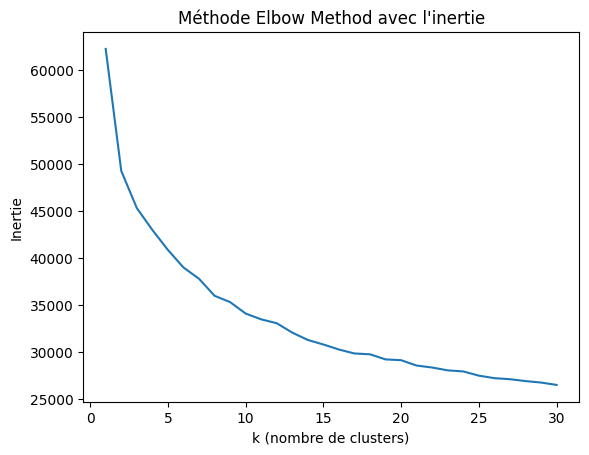

In [72]:
# Affichage du graphique de la méthode 'Elbow'
sns.lineplot(x = K, y = lst_inertias)
plt.xlabel('k (nombre de clusters)')
plt.ylabel('Inertie')
plt.title("Méthode Elbow Method avec l'inertie")
plt.show()

In [73]:
line_Elbow_method = px.line(
    data_frame=df_10_agg_birth_year,
    title='Elbow method',
    width=600,
    height=400,
    x=K,
    y=lst_inertias,
    # color='',
    category_orders={'':['', ''],},
    # color_discrete_sequence=['plum', 'skyblue', 'limegreen', 'goldenrod', 'firebrick'],
    # opacity=0.5,
    # log_x=False, log_y=False,
    range_x=[0,31],
    # range_y=[0,1700],
    # text_auto=True,
    # template='plotly_dark',
    markers=True,
)

line_Elbow_method.update_layout(
    paper_bgcolor = 'ghostwhite', # nom de couleur (CSS name) pour le papier (arrière-plan)
    plot_bgcolor='white', # nom de couleur (CSS name) pour le fond du graphique
    title={
        'font':{
            # 'color':'darkgreen',
            # 'family':'Arial',
            'size':24
        },
        'x':0.5,
        'xanchor': 'center', # Centrage horizontal du titre
        'y': 0.97,
        'yanchor': 'top', # aligmenent vertical du titre
        # 'yref':'paper', # Référence pour 'y' ('container' (défaut) ou 'paper')
        'pad':{
            # 'b':50,
            # 't':20
        },
    },
    margin={
        'l':10,
        'r':10,
        'b': 20,
        't':40
    }, # ajustement des marges,
)

line_Elbow_method.update_traces(
    marker={
        # 'color':'skyblue',
        'line':{
            'width':1.0,
            'color':'black'
        },
        'size':8,
    },
    line={
        'shape':'linear',
        'width':3,
    },

)

line_Elbow_method.update_xaxes(
    showline=True, linewidth=2, linecolor='black',
    showgrid=True, gridwidth=1, gridcolor='lightgrey', griddash='dash',
    title={
        'font':{
            'size':14, # même chose : title_font_size=14,
        },
        'standoff':5, # distance entre le titre et les étiquettes de l'axe
        'text':'number of clusters k',
    },
    tickfont={
        # 'color':'rgb(50, 50, 50)', # 'darkslategrey',
        'size':10, # même chose : tickfont_size=10
    }
)
line_Elbow_method.update_yaxes(
    showline=True, linewidth=2, linecolor='black',
    showgrid=True, gridwidth=1, gridcolor='lightgrey', griddash='dash',
    #domain=[0,1],
    title={
        'font':{
            'size':14, # même chose : title_font_size=14,
        },
        'standoff':5, # distance entre le titre et les étiquettes de l'axe
        'text':'inertia',
    },
    tickfont={
        # 'color':'rgb(50, 50, 50)', # 'darkslategrey',
        'size':10, # même chose : tickfont_size=10
    }
)

line_Elbow_method.show()

### Score "*Silhouette*"

In [74]:
# Liste des silhouette_score
lst_silhouette_score = []

# Liste des valeurs de k (nombre de clusters)
K_s = range(2, 21)

# Boucle sur le nombre de clusters
for k in K_s:
  # Création et entraînement du modèle
  model_KM_s = KMeans(n_clusters=k, random_state = 42)
  model_KM_s.fit(X_preprocessed)
  print(f'- k = {k} => silhouette = {silhouette_score(X_preprocessed, model_KM_s.labels_)}')
  lst_silhouette_score.append(silhouette_score(X_preprocessed, model_KM_s.labels_))


- k = 2 => silhouette = 0.22651109208758735
- k = 3 => silhouette = 0.14838502018313884
- k = 4 => silhouette = 0.14988465138061743
- k = 5 => silhouette = 0.10203155598966185
- k = 6 => silhouette = 0.10807230719722315
- k = 7 => silhouette = 0.09999587071506516
- k = 8 => silhouette = 0.10502979225452128
- k = 9 => silhouette = 0.0992878842338146
- k = 10 => silhouette = 0.10879053781492098
- k = 11 => silhouette = 0.10461522243193601
- k = 12 => silhouette = 0.0760748384097117
- k = 13 => silhouette = 0.11229201756206264
- k = 14 => silhouette = 0.0840112319351511
- k = 15 => silhouette = 0.08526851489444516
- k = 16 => silhouette = 0.11275997798403249
- k = 17 => silhouette = 0.0899922566399029
- k = 18 => silhouette = 0.1100915486775727
- k = 19 => silhouette = 0.0831396165409697
- k = 20 => silhouette = 0.08489874634728124


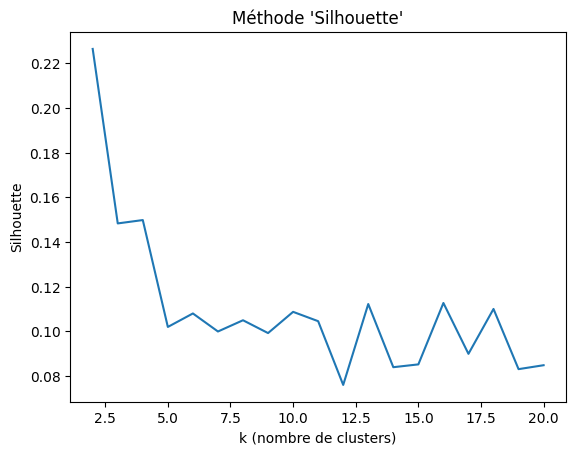

In [75]:
# Affichage du graphique de la méthode 'Silhouette'
sns.lineplot(x = K_s, y = lst_silhouette_score)
plt.xlabel('k (nombre de clusters)')
plt.ylabel('Silhouette')
plt.title("Méthode 'Silhouette'")
plt.show()

In [76]:
line_Silhouette_method = px.line(
    data_frame=df_10_agg_birth_year,
    title='Silhouette method',
    width=600,
    height=400,
    x=K_s,
    y=lst_silhouette_score,
    # color='',
    category_orders={'':['', ''],},
    # color_discrete_sequence=['plum', 'skyblue', 'limegreen', 'goldenrod', 'firebrick'],
    # opacity=0.5,
    # log_x=False, log_y=False,
    range_x=[0,21],
    # range_y=[0,1700],
    # text_auto=True,
    # template='plotly_dark',
    markers=True,
)

line_Silhouette_method.update_layout(
    paper_bgcolor = 'ghostwhite', # nom de couleur (CSS name) pour le papier (arrière-plan)
    plot_bgcolor='white', # nom de couleur (CSS name) pour le fond du graphique
    title={
        'font':{
            # 'color':'darkgreen',
            # 'family':'Arial',
            'size':24
        },
        'x':0.5,
        'xanchor': 'center', # Centrage horizontal du titre
        'y': 0.97,
        'yanchor': 'top', # aligmenent vertical du titre
        # 'yref':'paper', # Référence pour 'y' ('container' (défaut) ou 'paper')
        'pad':{
            # 'b':50,
            # 't':20
        },
    },
    margin={
        'l':10,
        'r':10,
        'b': 20,
        't':40
    }, # ajustement des marges,
)

line_Silhouette_method.update_traces(
    marker={
        # 'color':'skyblue',
        'line':{
            'width':1.0,
            'color':'black'
        },
        'size':8,
    },
    line={
        'shape':'linear',
        'width':3,
    },

)

line_Silhouette_method.update_xaxes(
    showline=True, linewidth=2, linecolor='black',
    showgrid=True, gridwidth=1, gridcolor='lightgrey', griddash='dash',
    title={
        'font':{
            'size':14, # même chose : title_font_size=14,
        },
        'standoff':5, # distance entre le titre et les étiquettes de l'axe
        'text':'number of clusters k',
    },
    tickfont={
        # 'color':'rgb(50, 50, 50)', # 'darkslategrey',
        'size':10, # même chose : tickfont_size=10
    }
)
line_Silhouette_method.update_yaxes(
    showline=True, linewidth=2, linecolor='black',
    showgrid=True, gridwidth=1, gridcolor='lightgrey', griddash='dash',
    #domain=[0,1],
    title={
        'font':{
            'size':14, # même chose : title_font_size=14,
        },
        'standoff':5, # distance entre le titre et les étiquettes de l'axe
        'text':'silhouette_score',
    },
    tickfont={
        # 'color':'rgb(50, 50, 50)', # 'darkslategrey',
        'size':10, # même chose : tickfont_size=10
    }
)

line_Silhouette_method.show()

### k = 2 clusters

In [77]:
# Création du modèle
model_KM_k_02 = KMeans(n_clusters = 2, random_state = 42)

# Entraînement du modèle
model_KM_k_02.fit(X_preprocessed)

KMeans(n_clusters=2, random_state=42)

In [78]:
y_pred = model_KM_k_02.predict(X_preprocessed)

In [79]:
df_2_clusters = df_clustering.copy()
df_2_clusters['cluster'] = y_pred
df_2_clusters['cluster'] = df_2_clusters['cluster'].astype('category')
df_2_clusters

,ID,Year_Birth,Age,Age_group,Education,Marital_Status,Relation_Status,Income,Kidhome,Teenhome,...,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,Year_Birth_bin,Date_enrol,cluster
0,5524,1957,67,60-70 ans,Graduation,Single,Single,58138.0,0,0,...,0,0,0,0,0,0,1,1955-1959,20120409,1
1,2174,1954,70,70-80 ans,Graduation,Single,Single,46344.0,1,1,...,0,0,0,0,0,0,0,1950-1954,20140803,0
2,4141,1965,59,50-60 ans,Graduation,Together,Relationship,71613.0,0,0,...,0,0,0,0,0,0,0,1965-1969,20130821,1
3,6182,1984,40,40-50 ans,Graduation,Together,Relationship,26646.0,1,0,...,0,0,0,0,0,0,0,1980-1984,20141002,0
4,5324,1981,43,40-50 ans,PhD,Married,Relationship,58293.0,1,0,...,0,0,0,0,0,0,0,1980-1984,20140119,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,1986,38,30-40 ans,Graduation,Single,Single,26816.0,0,0,...,0,0,0,0,0,0,0,1985-1989,20120817,0
2235,10870,1967,57,50-60 ans,Graduation,Married,Relationship,61223.0,0,1,...,0,0,0,0,0,0,0,1965-1969,20130613,1
2237,7270,1981,43,40-50 ans,Graduation,Divorced,Single,56981.0,0,0,...,0,0,0,1,0,0,0,1980-1984,20140125,1
2238,8235,1956,68,60-70 ans,Master,Together,Relationship,69245.0,0,1,...,0,0,0,0,0,0,0,1955-1959,20140124,1


In [80]:
# Enregistrement/export en fichier csv
# df_2_clusters.to_csv('df_2_clusters.csv')

## Analyse des 2 clusters

In [81]:
# Nombre de points dans chaque cluster
df_2_clusters.cluster.value_counts()

0    1234
1     808
Name: cluster, dtype: int64

In [82]:
df_2_clusters[['cluster', 'Marital_Status']].value_counts()

cluster  Marital_Status
0        Married           490
         Together          315
1        Married           301
0        Single            274
1        Together          203
         Single            173
0        Divorced          121
1        Divorced           94
         Widow              37
0        Widow              34
dtype: int64

In [83]:
df_2_clusters[['cluster', 'Education']].value_counts()

cluster  Education 
0        Graduation    595
1        Graduation    429
0        PhD           256
         Master        217
1        PhD           187
         Master        123
0        2n Cycle      118
1        2n Cycle       68
0        Basic          48
1        Basic           1
dtype: int64

## Comparaisons des 2 clusters

In [84]:
# @title
# Fonction pour tracer un histogramme
def hist_plot(data_frame, col_x, title, height=400, width=800):
  fig_hist = px.histogram(
      data_frame=data_frame,
      title=title,
      width=width,
      height=height,
      x=col_x,
      # y='',
      # orientation='h',
      color='cluster',
      category_orders={
          'cluster':[0, 1]},
      color_discrete_sequence=['skyblue','firebrick'],
      # color_discrete_map={0:'skyblue', 1:'firebrick'},
      # pattern_shape='cluster',
      # pattern_shape_sequence=["x", "-", "+", ".", "|", "/", "\\"],
        # Besoin de "\\" pour échapper la caractère spécial "\"
      # pattern_shape_map={0:"x", 1:"-"},
      # facet_row='',
      # facet_row_spacing=0.05,
      # facet_col='',
      # facet_col_wrap=2,
      # facet_col_spacing=0.05,
      # hover_name='',
      # hover_data=['', ''],
      # labels={'':''}, # pour changer le nom des labels
      marginal='box',
      opacity=0.7,
      barmode='overlay',
      # barnorm='percent',
      # histfunc='count',
      # histnorm='density',
      # log_x=False, log_y=False,
      # range_x=[50,950],
      # range_y=[0,1700],
  )

  fig_hist.update_layout(
      paper_bgcolor = 'ghostwhite', # nom de couleur (CSS name) pour le papier (arrière-plan)
      plot_bgcolor='white', # nom de couleur (CSS name) pour le fond du graphique
      title={
          'font':{
              # 'color':'steelblue', # 'darkgreen',
              # 'family':'Arial',
              'size':24
          },
          'x':0.5,
          'xanchor': 'center', # Centrage horizontal du titre
          'y': 0.97,
          'yanchor': 'top', # aligmenent vertical du titre
          # 'yref':'paper', # Référence pour 'y' ('container' (défaut) ou 'paper')
          'pad':{
              # 'b':50,
              # 't':20
          },
      },
      legend={
          'bgcolor':'white', # 'mediumturquoise',
          'bordercolor':'black',
          'borderwidth':1,
          # 'entrywidth':0,
          # 'entrywidthmode':'pixels',
          # 'itemwidth':40,
          'font': {
              # 'color':'darkslategrey',
              #'family':'Open Sans, verdana, arial, sans-serif',
              'size': 14},
          'title':{
              # 'text':'', # Personnalise le titre de la légende
              'font': {
                  # 'color':'black',
                  'size': 16, # Ajuste taille titre de la légende
                  # 'family': , #
              },
              # 'side':'left',
          },
          # 'xref':'paper', # or 'container'
          'x':0.99,
          'xanchor':'right', #'center',
          # 'yref':'paper', # or 'container'
          'y':0.72,
          'yanchor':'top', # 'bottom',
          'orientation': 'v'
      },
      margin={
          'autoexpand':True,
          'b':20,
          'l':20,
          'r':20,
          't':40,
          'pad':0,
      }, # ajustement des marges,
  )

  fig_hist.update_traces(marker_line_width=0.5,marker_line_color="black")

  fig_hist.update_xaxes(
      showline=True, linewidth=2, linecolor='black',
      showgrid=True, gridwidth=1, gridcolor='lightgrey', griddash='dash',
      title_standoff=3,
  )
  fig_hist.update_yaxes(
      showline=True, linewidth=2, linecolor='black',
      showgrid=True, gridwidth=1, gridcolor='lightgrey', griddash='dash',
      title_standoff=3,
  )

  return fig_hist

### Revenus

In [85]:
hist_income_cluster = hist_plot(
    data_frame=df_2_clusters, col_x='Income',
    title='Histogram of income per cluster', height=450, width=800)
hist_income_cluster.show()

### Dépenses totales

In [86]:
hist_total_amount_cluster = hist_plot(
    data_frame=df_2_clusters, col_x='MntAllProducts',
    title='Histogram of total amount spent per cluster', height=450, width=800)
hist_total_amount_cluster.show()

### Nombre total d'enfants et ados

In [87]:
hist_total_kids_cluster = hist_plot(
    data_frame=df_2_clusters, col_x='TotalChildHome',
    title='Histogram of total childs per cluster', height=450, width=800)
hist_total_kids_cluster.show()

### Age

In [88]:
hist_age_cluster = hist_plot(
    data_frame=df_2_clusters, col_x='Age',
    title='Histogram of age per cluster', height=450, width=800)
hist_age_cluster.show()

### Nombre de visites web

In [89]:
hist_nb_visits_web_cluster = hist_plot(
    data_frame=df_2_clusters, col_x='NumWebVisitsMonth',
    title='Histogram of number of monthly visits of website per cluster', height=450, width=800)
hist_nb_visits_web_cluster.show()

### Nombre d'achats par catalogue

In [90]:
hist_nb_catalog_purchases_cluster = hist_plot(
    data_frame=df_2_clusters, col_x='NumCatalogPurchases',
    title='Histogram of number of purchases by catalogue per cluster', height=450, width=800)
hist_nb_catalog_purchases_cluster.show()

### Nombre d'achats en magasin

In [91]:
hist_nb_store_purchases_cluster = hist_plot(
    data_frame=df_2_clusters, col_x='NumStorePurchases',
    title='Histogram of number of purchases in store per cluster', height=450, width=800)
hist_nb_store_purchases_cluster.show()

### Niveau d'études

In [92]:
# Aggrégation des données par cluster et niveau d'études
df_agg_education_cluster = pd.DataFrame(df_2_clusters.groupby(['cluster', 'Education'])['ID'].count())
df_agg_education_cluster.reset_index(inplace=True)
df_agg_education_cluster.rename(columns={'ID':'count'}, inplace=True)
df_agg_education_cluster.cluster = df_agg_education_cluster.cluster.astype("category")
df_agg_education_cluster

,cluster,Education,count
0,0,2n Cycle,118
1,0,Basic,48
2,0,Graduation,595
3,0,Master,217
4,0,PhD,256
5,1,2n Cycle,68
6,1,Basic,1
7,1,Graduation,429
8,1,Master,123
9,1,PhD,187


In [93]:
# Tracé d'un bar chart à hauteur relative
hist_education_cluster = px.histogram(
    data_frame=df_agg_education_cluster,
    title='Barchart of cluster ratio per education level',
    width=800,
    height=450,
    x='Education',
    y='count',
    # orientation='h',
    color='cluster',
    category_orders={
        'cluster':[0, 1],
        'Education':['Basic', 'Graduation', '2n Cycle', 'Master', 'PhD']
    },
    color_discrete_sequence=['skyblue','firebrick'],
    # color_discrete_map={0:'skyblue', 1:'firebrick'},
    # pattern_shape='cluster',
    # pattern_shape_sequence=["x", "-", "+", ".", "|", "/", "\\"],
      # Besoin de "\\" pour échapper la caractère spécial "\"
    # pattern_shape_map={0:"x", 1:"-"},
    # facet_row='',
    # facet_row_spacing=0.05,
    # facet_col='',
    # facet_col_wrap=2,
    # facet_col_spacing=0.05,
    # hover_name='',
    # hover_data=['', ''],
    # labels={'':''}, # pour changer le nom des labels
    # text='',
    opacity=0.7,
    barmode='relative', #'group', #'overlay',
    # barmode='overlay',
    barnorm='percent', # (pour les histogrammes)
    # text_auto=True,
    # template='gridon' # 'plotly_dark',
    # log_x=False, log_y=False,
    # range_x=[50,950],
    # range_y=[0,1700],
)

hist_education_cluster.update_layout(
    paper_bgcolor = 'ghostwhite', # nom de couleur (CSS name) pour le papier (arrière-plan)
    plot_bgcolor='white', # nom de couleur (CSS name) pour le fond du graphique
    title={
        'font':{
            # 'color':'steelblue', # 'darkgreen',
            # 'family':'Arial',
            'size':24
        },
        'x':0.5,
        'xanchor': 'center', # Centrage horizontal du titre
        'y': 0.97,
        'yanchor': 'top', # aligmenent vertical du titre
        # 'yref':'paper', # Référence pour 'y' ('container' (défaut) ou 'paper')
        'pad':{
            # 'b':50,
            # 't':20
        },
    },
    legend={
        'bgcolor':'white', # 'mediumturquoise',
        'bordercolor':'black',
        'borderwidth':1,
        # 'entrywidth':0,
        # 'entrywidthmode':'pixels',
        # 'itemwidth':40,
        'font': {
            # 'color':'darkslategrey',
            #'family':'Open Sans, verdana, arial, sans-serif',
            'size': 14},
        'title':{
            # 'text':'', # Personnalise le titre de la légende
            'font': {
                # 'color':'black',
                'size': 16, # Ajuste taille titre de la légende
                # 'family': , #
            },
            # 'side':'left',
        },
        # 'xref':'paper', # or 'container'
        'x':0.99,
        'xanchor':'right', #'center',
        # 'yref':'paper', # or 'container'
        'y':0.9,
        'yanchor':'top', # 'bottom',
        'orientation': 'v'
    },
    margin={
        'autoexpand':True,
        'b':20,
        'l':20,
        'r':20,
        't':40,
        'pad':0,
    }, # ajustement des marges,
)

hist_education_cluster.update_traces(marker_line_width=0.5,marker_line_color="black")

hist_education_cluster.update_xaxes(
    showline=True, linewidth=2, linecolor='black',
    # showgrid=True, gridwidth=1, gridcolor='lightgrey', griddash='dash',
    title_standoff=5,
)

hist_education_cluster.update_yaxes(
    showline=True, linewidth=2, linecolor='black',
    showgrid=True, gridwidth=1, gridcolor='lightgrey', griddash='dash',
    title_standoff=2,
    title_text='count'
)

hist_education_cluster.show()

### Scatter plot revenus vs. nombre d'enfants

In [98]:
scatt_Income_Child_Home = px.scatter(
    data_frame=df_2_clusters,
    title='Income vs. total childs at home',
    width=800,
    height=400,
    x='TotalChildHome',
    y='Income',
    color='cluster',
    category_orders={'cluster':[0,1]},
    color_discrete_sequence=['skyblue','firebrick'],
    # color_discrete_map={'Basic':'lightskyblue', 'Graduation':'darkgrey', '2n Cycle':'red'},
    # facet_row='',
    # facet_row_spacing=0.05,
    # face_col='',
    # facet_col_wrap=2,
    # facet_col_spacing=0.05,
    # marginal_x='box',
    # marginal_y='box',
    opacity=0.7,
    # trendline='ols',
    # barmode='overlay',
    # barnorm='percent',
    # histfunc='count',
    # histnorm='density',
    # log_x=False, log_y=False,
    # range_x=[50,950],
    # range_y=[0,1700],
    # nbins=50,
    # text_auto=True,
    # template='plotly_dark',
)

scatt_Income_Child_Home.update_layout(
    paper_bgcolor = 'ghostwhite', # nom de couleur (CSS name) pour le papier (arrière-plan)
    #plot_bgcolor='ghostwhite', # nom de couleur (CSS name) pour le fond du graphique
    plot_bgcolor='white', # nom de couleur (CSS name) pour le fond du graphique
    title={
        'font':{
            # 'color':'darkgreen',
            # 'family':'Arial',
            'size':24
        },
        'x':0.5,
        'xanchor': 'center', # Centrage horizontal du titre
        'y': 0.97,
        'yanchor': 'top', # aligmenent vertical du titre
        # 'yref':'paper', # Référence pour 'y' ('container' (défaut) ou 'paper')
        'pad':{
            # 'b':50,
            # 't':20
        },
    },
    legend={
        'bgcolor':'white', # 'mediumturquoise',
        'bordercolor':'black',
        'borderwidth':1,
        # 'entrywidth':0,
        # 'entrywidthmode':'pixels',
        # 'itemwidth':40,
        'font': {
            # 'color':'darkslategrey',
            #'family':'Open Sans, verdana, arial, sans-serif',
            'size': 14},
        'title':{
            # 'text':'', # Personnalise le titre de la légende
            'font': {
                # 'color':'black',
                'size': 16, # Ajuste taille titre de la légende
                # 'family': , #
            },
            # 'side':'left',
        },
        # 'xref':'paper', # or 'container'
        'x':1.01,
        'xanchor':'left', #'right', #'center',
        # 'yref':'paper', # or 'container'
        'y':0.95,
        'yanchor':'top', # 'bottom',
        'orientation': 'v'
    },
    margin={
        'l':10,
        'r':10,
        'b':20,
        't':40
    }, # ajustement des marges,
    scattermode='group',
)

scatt_Income_Child_Home.update_traces(
    marker_line_width=0.5,marker_line_color="black")

scatt_Income_Child_Home.update_xaxes(
    showline=True, linewidth=2, linecolor='black',
    showgrid=True, gridwidth=1, gridcolor='lightgrey', griddash='dash',
    title={
        'font':{
            'size':14, # même chose : title_font_size=14,
        },
        'standoff':5 # distance entre le titre et les étiquettes de l'axe
    },
    tickfont={
        # 'color':'rgb(50, 50, 50)', # 'darkslategrey',
        'size':10, # même chose : tickfont_size=10
    },
    dtick=1, # espace entre les 'ticks' de l'axe
)
scatt_Income_Child_Home.update_yaxes(
    showline=True, linewidth=2, linecolor='black',
    showgrid=True, gridwidth=1, gridcolor='lightgrey', griddash='dash',
    #domain=[0,1],
    title={
        'font':{
            'size':14, # même chose : title_font_size=14,
        },
        'standoff':5 # distance entre le titre et les étiquettes de l'axe
    },
    tickfont={
        # 'color':'rgb(50, 50, 50)', # 'darkslategrey',
        'size':10, # même chose : tickfont_size=10
    }
)

scatt_Income_Child_Home.show()

In [99]:
df_2_clusters.columns

Index(['ID', 'Year_Birth', 'Age', 'Age_group', 'Education', 'Marital_Status',
       'Relation_Status', 'Income', 'Kidhome', 'Teenhome', 'TotalChildHome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'MntAllProducts',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1',
       'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'Complain', 'Response', 'Year_Birth_bin', 'Date_enrol', 'cluster'],
      dtype='object')

## Hierarchical clustering
Le principe ici est de tracer un "*dendrogram*" (figure avec une structure en arbre montrant le regroupement de clusters) pour visualiser les clusters, puis de trouver visuellement le nombre de clusters optimal.  
Ensuite, on utilise un algorithme `AgglomerativeClustering`, avec ce nombre de clusters, pour définir à quel cluster appartient chaque point de données.

### Dendrogram des clusters

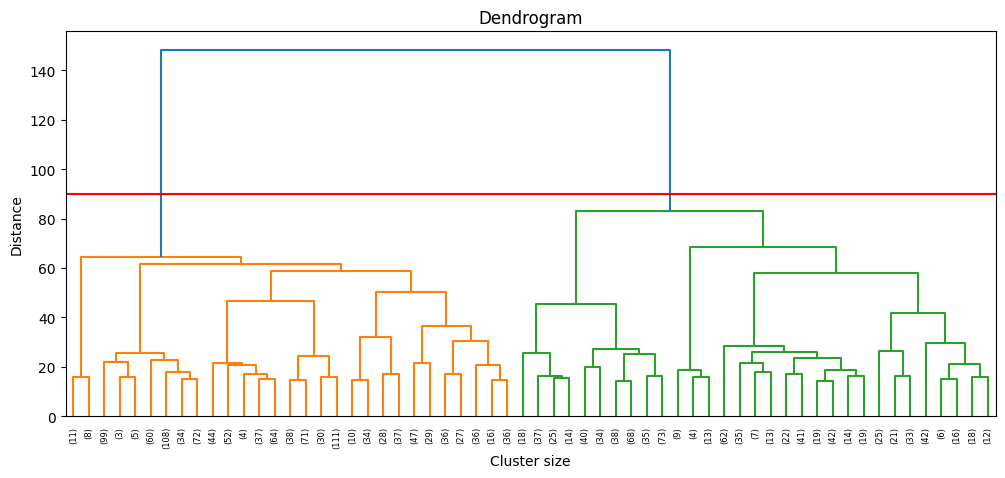

In [100]:
plt.figure(figsize=(12,5))
plt.title('Dendrogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')

clusters = shc.linkage(
    y=X_preprocessed,
    method='ward',
    metric='euclidean'
)
shc.dendrogram(Z=clusters, p=60, truncate_mode='lastp', color_threshold=90)
plt.axhline(y = 90, color = 'r', linestyle = '-')

plt.show()

#### Interprétation
Pour choisir le nombre de clusters optimal, il faut **regarder la longueur des branches verticales qui représente la distance entre les clusters**. Ici, on voir que c'est pour 2 clusters que cette distance est la plus importante. Cela semble donc confirmer que **le nombre optimal de clusters est 2**.

### Agglomerative Hierarchical Clustering
Une fois connu ce nombre optimal de clusters, pour ensuite définir le cluster auquel appartient chaque point, on applique un clustering hiérarchique agglomératif, c'est-à-dire qui part du bas (des points) vers le haut.

In [101]:
# Application de l'algo AgglomerativeClustering avec 2 clusters,
# en reprenant les mêmes méthode et métrique que pour le tracé du dendrogram
clustering_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean',
                                           linkage='ward')
clustering_model.fit(X_preprocessed)
# Affichage des clusters
clustering_model.labels_

array([0, 1, 0, ..., 0, 0, 1])

In [102]:
df_2_clusters_ahc = df_2_clusters.copy()

# Ajout de la colonne avec les nouveaux clusters
df_2_clusters_ahc['cluster_ahc'] = clustering_model.labels_

# Inversion des classes 0 et 1 pour plus de cohérence
df_2_clusters_ahc['cluster_ahc'] = df_2_clusters_ahc['cluster_ahc'].apply(
    lambda x: 1 if x == 0 else 0)
df_2_clusters_ahc['cluster_ahc'] = df_2_clusters_ahc['cluster_ahc'].astype('category')
df_2_clusters_ahc

,ID,Year_Birth,Age,Age_group,Education,Marital_Status,Relation_Status,Income,Kidhome,Teenhome,...,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,Year_Birth_bin,Date_enrol,cluster,cluster_ahc
0,5524,1957,67,60-70 ans,Graduation,Single,Single,58138.0,0,0,...,0,0,0,0,0,1,1955-1959,20120409,1,1
1,2174,1954,70,70-80 ans,Graduation,Single,Single,46344.0,1,1,...,0,0,0,0,0,0,1950-1954,20140803,0,0
2,4141,1965,59,50-60 ans,Graduation,Together,Relationship,71613.0,0,0,...,0,0,0,0,0,0,1965-1969,20130821,1,1
3,6182,1984,40,40-50 ans,Graduation,Together,Relationship,26646.0,1,0,...,0,0,0,0,0,0,1980-1984,20141002,0,0
4,5324,1981,43,40-50 ans,PhD,Married,Relationship,58293.0,1,0,...,0,0,0,0,0,0,1980-1984,20140119,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,1986,38,30-40 ans,Graduation,Single,Single,26816.0,0,0,...,0,0,0,0,0,0,1985-1989,20120817,0,0
2235,10870,1967,57,50-60 ans,Graduation,Married,Relationship,61223.0,0,1,...,0,0,0,0,0,0,1965-1969,20130613,1,1
2237,7270,1981,43,40-50 ans,Graduation,Divorced,Single,56981.0,0,0,...,0,0,1,0,0,0,1980-1984,20140125,1,1
2238,8235,1956,68,60-70 ans,Master,Together,Relationship,69245.0,0,1,...,0,0,0,0,0,0,1955-1959,20140124,1,1


In [103]:
# Comparaison des clusters
df_2_clusters_ahc[['cluster', 'cluster_ahc']].value_counts()

cluster  cluster_ahc
0        0              1101
1        1               722
0        1               133
1        0                86
dtype: int64

# Fin

### OLD - Statut marital (bar chart)

In [ ]:
df_agg_marital_status_cluster = pd.DataFrame(df_2_clusters.groupby(['cluster', 'Marital_Status'])['ID'].count())
df_agg_marital_status_cluster.reset_index(inplace=True)
df_agg_marital_status_cluster.rename(columns={'ID':'nb'}, inplace=True)
df_agg_marital_status_cluster.cluster = df_agg_marital_status_cluster.cluster.astype("category")
df_agg_marital_status_cluster

,cluster,Marital_Status,nb
0,0,Divorced,121
1,0,Married,490
2,0,Single,274
3,0,Together,315
4,0,Widow,34
5,1,Divorced,94
6,1,Married,301
7,1,Single,173
8,1,Together,203
9,1,Widow,37


In [ ]:
bar_marital_status_cluster = px.bar(
    data_frame=df_agg_marital_status_cluster,
    title='Barchart of marital status',
    width=800,
    height=450,
    x='Marital_Status',
    y='nb',
    # orientation='h',
    color='cluster',
    category_orders={'cluster':[0, 1]},
    color_discrete_sequence=['skyblue','firebrick'],
    # color_discrete_map={0:'skyblue', 1:'firebrick'},
    # pattern_shape='cluster',
    # pattern_shape_sequence=["x", "-", "+", ".", "|", "/", "\\"],
      # Besoin de "\\" pour échapper la caractère spécial "\"
    # pattern_shape_map={0:"x", 1:"-"},
    # facet_row='',
    # facet_row_spacing=0.05,
    # facet_col='',
    # facet_col_wrap=2,
    # facet_col_spacing=0.05,
    # hover_name='',
    # hover_data=['', ''],
    # labels={'':''}, # pour changer le nom des labels
    # text='',
    opacity=0.7,
    barmode='relative', #'group', #'overlay',
    # barmode='overlay',
    # barnorm='percent', # (pour les histogrammes)
    # text_auto=True,
    # template='gridon' # 'plotly_dark',
    # log_x=False, log_y=False,
    # range_x=[50,950],
    # range_y=[0,1700],
)

bar_marital_status_cluster.update_layout(
    paper_bgcolor = 'ghostwhite', # nom de couleur (CSS name) pour le papier (arrière-plan)
    plot_bgcolor='white', # nom de couleur (CSS name) pour le fond du graphique
    title={
        'font':{
            # 'color':'steelblue', # 'darkgreen',
            # 'family':'Arial',
            'size':24
        },
        'x':0.5,
        'xanchor': 'center', # Centrage horizontal du titre
        'y': 0.97,
        'yanchor': 'top', # aligmenent vertical du titre
        # 'yref':'paper', # Référence pour 'y' ('container' (défaut) ou 'paper')
        'pad':{
            # 'b':50,
            # 't':20
        },
    },
    legend={
        'bgcolor':'white', # 'mediumturquoise',
        'bordercolor':'black',
        'borderwidth':1,
        # 'entrywidth':0,
        # 'entrywidthmode':'pixels',
        # 'itemwidth':40,
        'font': {
            # 'color':'darkslategrey',
            #'family':'Open Sans, verdana, arial, sans-serif',
            'size': 14},
        'title':{
            # 'text':'', # Personnalise le titre de la légende
            'font': {
                # 'color':'black',
                'size': 16, # Ajuste taille titre de la légende
                # 'family': , #
            },
            # 'side':'left',
        },
        # 'xref':'paper', # or 'container'
        'x':0.99,
        'xanchor':'right', #'center',
        # 'yref':'paper', # or 'container'
        'y':0.72,
        'yanchor':'top', # 'bottom',
        'orientation': 'v'
    },
    margin={
        'autoexpand':True,
        'b':20,
        'l':20,
        'r':20,
        't':40,
        'pad':0,
    }, # ajustement des marges,
)

bar_marital_status_cluster.update_traces(marker_line_width=0.5,marker_line_color="black")

# bar_marital_status_cluster.update_xaxes(
#     showline=True, linewidth=2, linecolor='black',
#     showgrid=True, gridwidth=1, gridcolor='lightgrey', griddash='dash'
# )
bar_marital_status_cluster.update_yaxes(
    showline=True, linewidth=2, linecolor='black',
    showgrid=True, gridwidth=1, gridcolor='lightgrey', griddash='dash',
    title_standoff=3,
)

bar_marital_status_cluster.show()

### OLD - Statut marital (histogram)

In [ ]:
hist_marital_status_cluster = px.histogram(
    data_frame=df_agg_marital_status_cluster,
    title='Barchart of marital status',
    width=800,
    height=450,
    x='Marital_Status',
    y='nb',
    # orientation='h',
    color='cluster',
    category_orders={'cluster':[0, 1]},
    color_discrete_sequence=['skyblue','firebrick'],
    # color_discrete_map={0:'skyblue', 1:'firebrick'},
    # pattern_shape='cluster',
    # pattern_shape_sequence=["x", "-", "+", ".", "|", "/", "\\"],
      # Besoin de "\\" pour échapper la caractère spécial "\"
    # pattern_shape_map={0:"x", 1:"-"},
    # facet_row='',
    # facet_row_spacing=0.05,
    # facet_col='',
    # facet_col_wrap=2,
    # facet_col_spacing=0.05,
    # hover_name='',
    # hover_data=['', ''],
    # labels={'':''}, # pour changer le nom des labels
    # text='',
    opacity=0.7,
    barmode='relative', #'group', #'overlay',
    # barmode='overlay',
    barnorm='percent', # (pour les histogrammes)
    # text_auto=True,
    # template='gridon' # 'plotly_dark',
    # log_x=False, log_y=False,
    # range_x=[50,950],
    # range_y=[0,1700],
)

hist_marital_status_cluster.update_layout(
    paper_bgcolor = 'ghostwhite', # nom de couleur (CSS name) pour le papier (arrière-plan)
    plot_bgcolor='white', # nom de couleur (CSS name) pour le fond du graphique
    title={
        'font':{
            # 'color':'steelblue', # 'darkgreen',
            # 'family':'Arial',
            'size':24
        },
        'x':0.5,
        'xanchor': 'center', # Centrage horizontal du titre
        'y': 0.97,
        'yanchor': 'top', # aligmenent vertical du titre
        # 'yref':'paper', # Référence pour 'y' ('container' (défaut) ou 'paper')
        'pad':{
            # 'b':50,
            # 't':20
        },
    },
    legend={
        'bgcolor':'white', # 'mediumturquoise',
        'bordercolor':'black',
        'borderwidth':1,
        # 'entrywidth':0,
        # 'entrywidthmode':'pixels',
        # 'itemwidth':40,
        'font': {
            # 'color':'darkslategrey',
            #'family':'Open Sans, verdana, arial, sans-serif',
            'size': 14},
        'title':{
            # 'text':'', # Personnalise le titre de la légende
            'font': {
                # 'color':'black',
                'size': 16, # Ajuste taille titre de la légende
                # 'family': , #
            },
            # 'side':'left',
        },
        # 'xref':'paper', # or 'container'
        'x':0.99,
        'xanchor':'right', #'center',
        # 'yref':'paper', # or 'container'
        'y':0.72,
        'yanchor':'top', # 'bottom',
        'orientation': 'v'
    },
    margin={
        'autoexpand':True,
        'b':20,
        'l':20,
        'r':20,
        't':40,
        'pad':0,
    }, # ajustement des marges,
)

hist_marital_status_cluster.update_traces(marker_line_width=0.5,marker_line_color="black")

# hist_marital_status_cluster.update_xaxes(
#     showline=True, linewidth=2, linecolor='black',
#     showgrid=True, gridwidth=1, gridcolor='lightgrey', griddash='dash'
# )
hist_marital_status_cluster.update_yaxes(
    showline=True, linewidth=2, linecolor='black',
    showgrid=True, gridwidth=1, gridcolor='lightgrey', griddash='dash',
    title_standoff=3,
)

hist_marital_status_cluster.show()

### OLD - Dendgrogram avec plotly

In [ ]:
# import plotly.figure_factory as ff
# dendogram_clusters = ff.create_dendrogram(
#     X=X_preprocessed,
#     linkagefun=lambda x:shc.linkage(
#         y=x,
#         method='ward',
#         metric='euclidean'
#     )
# )
# dendogram_clusters.update_layout(width=800, height=500)
# dendogram_clusters.show()

## OLD - tracé histogramme revenus par cluster

In [ ]:
hist_income_cluster = px.histogram(
    data_frame=df_2_clusters,
    title='Histogram of income per cluster',
    width=800,
    height=450,
    x='Income',
    # y='',
    # orientation='h',
    color='cluster',
    category_orders={
        'cluster':[0, 1]},
    color_discrete_sequence=['skyblue','firebrick'],
    # color_discrete_map={0:'skyblue', 1:'firebrick'},
    # pattern_shape='cluster',
    # pattern_shape_sequence=["x", "-", "+", ".", "|", "/", "\\"],
      # Besoin de "\\" pour échapper la caractère spécial "\"
    # pattern_shape_map={0:"x", 1:"-"},
    # facet_row='',
    # facet_row_spacing=0.05,
    # facet_col='',
    # facet_col_wrap=2,
    # facet_col_spacing=0.05,
    # hover_name='',
    # hover_data=['', ''],
    # labels={'':''}, # pour changer le nom des labels
    marginal='box',
    opacity=0.7,
    barmode='overlay',
    # barnorm='percent',
    # histfunc='count',
    # histnorm='density',
    # log_x=False, log_y=False,
    # range_x=[50,950],
    # range_y=[0,1700],
    # text_auto=True,
    # template='plotly_dark',
)

hist_income_cluster.update_layout(
    paper_bgcolor = 'ghostwhite', # nom de couleur (CSS name) pour le papier (arrière-plan)
    plot_bgcolor='white', # nom de couleur (CSS name) pour le fond du graphique
    title={
        'font':{
            # 'color':'darkgreen',
            # 'family':'Arial',
            'size':24
        },
        'x':0.5,
        'xanchor': 'center', # Centrage horizontal du titre
        'y': 0.97,
        'yanchor': 'top', # aligmenent vertical du titre
        # 'yref':'paper', # Référence pour 'y' ('container' (défaut) ou 'paper')
        'pad':{
            # 'b':50,
            # 't':20
        },
    },
    legend={
        'bgcolor':'white', # 'mediumturquoise',
        'bordercolor':'black',
        'borderwidth':1,
        # 'entrywidth':0,
        # 'entrywidthmode':'pixels',
        # 'itemwidth':40,
        'font': {
            # 'color':'darkslategrey',
            #'family':'Open Sans, verdana, arial, sans-serif',
            'size': 14},
        'title':{
            # 'text':'', # Personnalise le titre de la légende
            'font': {
                # 'color':'black',
                'size': 16, # Ajuste taille titre de la légende
                # 'family': , #
            },
            # 'side':'left',
        },
        # 'xref':'paper', # or 'container'
        'x':0.99,
        'xanchor':'right', #'center',
        # 'yref':'paper', # or 'container'
        'y':0.72,
        'yanchor':'top', # 'bottom',
        'orientation': 'v'
    },
    # width = 800, # ajustement de la largeur de la figure
    margin={
        'autoexpand':True,
        'b':20,
        'l':20,
        'r':20,
        't':40,
        'pad':0,
    }, # ajustement des marges,
)

hist_income_cluster.update_traces(marker_line_width=0.5,marker_line_color="black")

hist_income_cluster.update_xaxes(
    showline=True, linewidth=2, linecolor='black',
    showgrid=True, gridwidth=1, gridcolor='lightgrey', griddash='dash',
    title_standoff=3,
)
hist_income_cluster.update_yaxes(
    showline=True, linewidth=2, linecolor='black',
    showgrid=True, gridwidth=1, gridcolor='lightgrey', griddash='dash'
)

hist_income_cluster.show()

### OLD - Preprocessing des colonnes numériques et catégorielles
**NE PAS PRENDRE EN COMPTE**

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('standard_scaler', StandardScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('numerical_transformer', numeric_transformer,
     make_column_selector(dtype_include=np.number)),
    ('categorical_transformer', categorical_transformer,
     make_column_selector(dtype_include='category'))
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_transformer',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a778f7c27a0>),
                                                 ('categorical_transformer',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a778f7c0eb0>)]))])

In [ ]:
# df_preprocessed = pd.DataFrame(pipeline.fit_transform(X))
df_preprocessed = pipeline.fit_transform(X)
df_preprocessed.shape

(2042, 58)